# Collecting Population

In [ ]:
# collect population by county
import pandas as pd
df = pd.read_csv('counties_by_population_raw.csv')

# removing rows where the county id is 0
df2 = df[df.COUNTY != 0]
df2.head()

# renaming columns
df_rename = df2.rename(columns = {'COUNTY': 'county_id', 'STNAME': 'State', 'CTYNAME': 'County', 'POPESTIMATE2017': 'Population'})

# save to csv
df2.to_csv('counties_by_population_2017.csv', header=1, index=False)

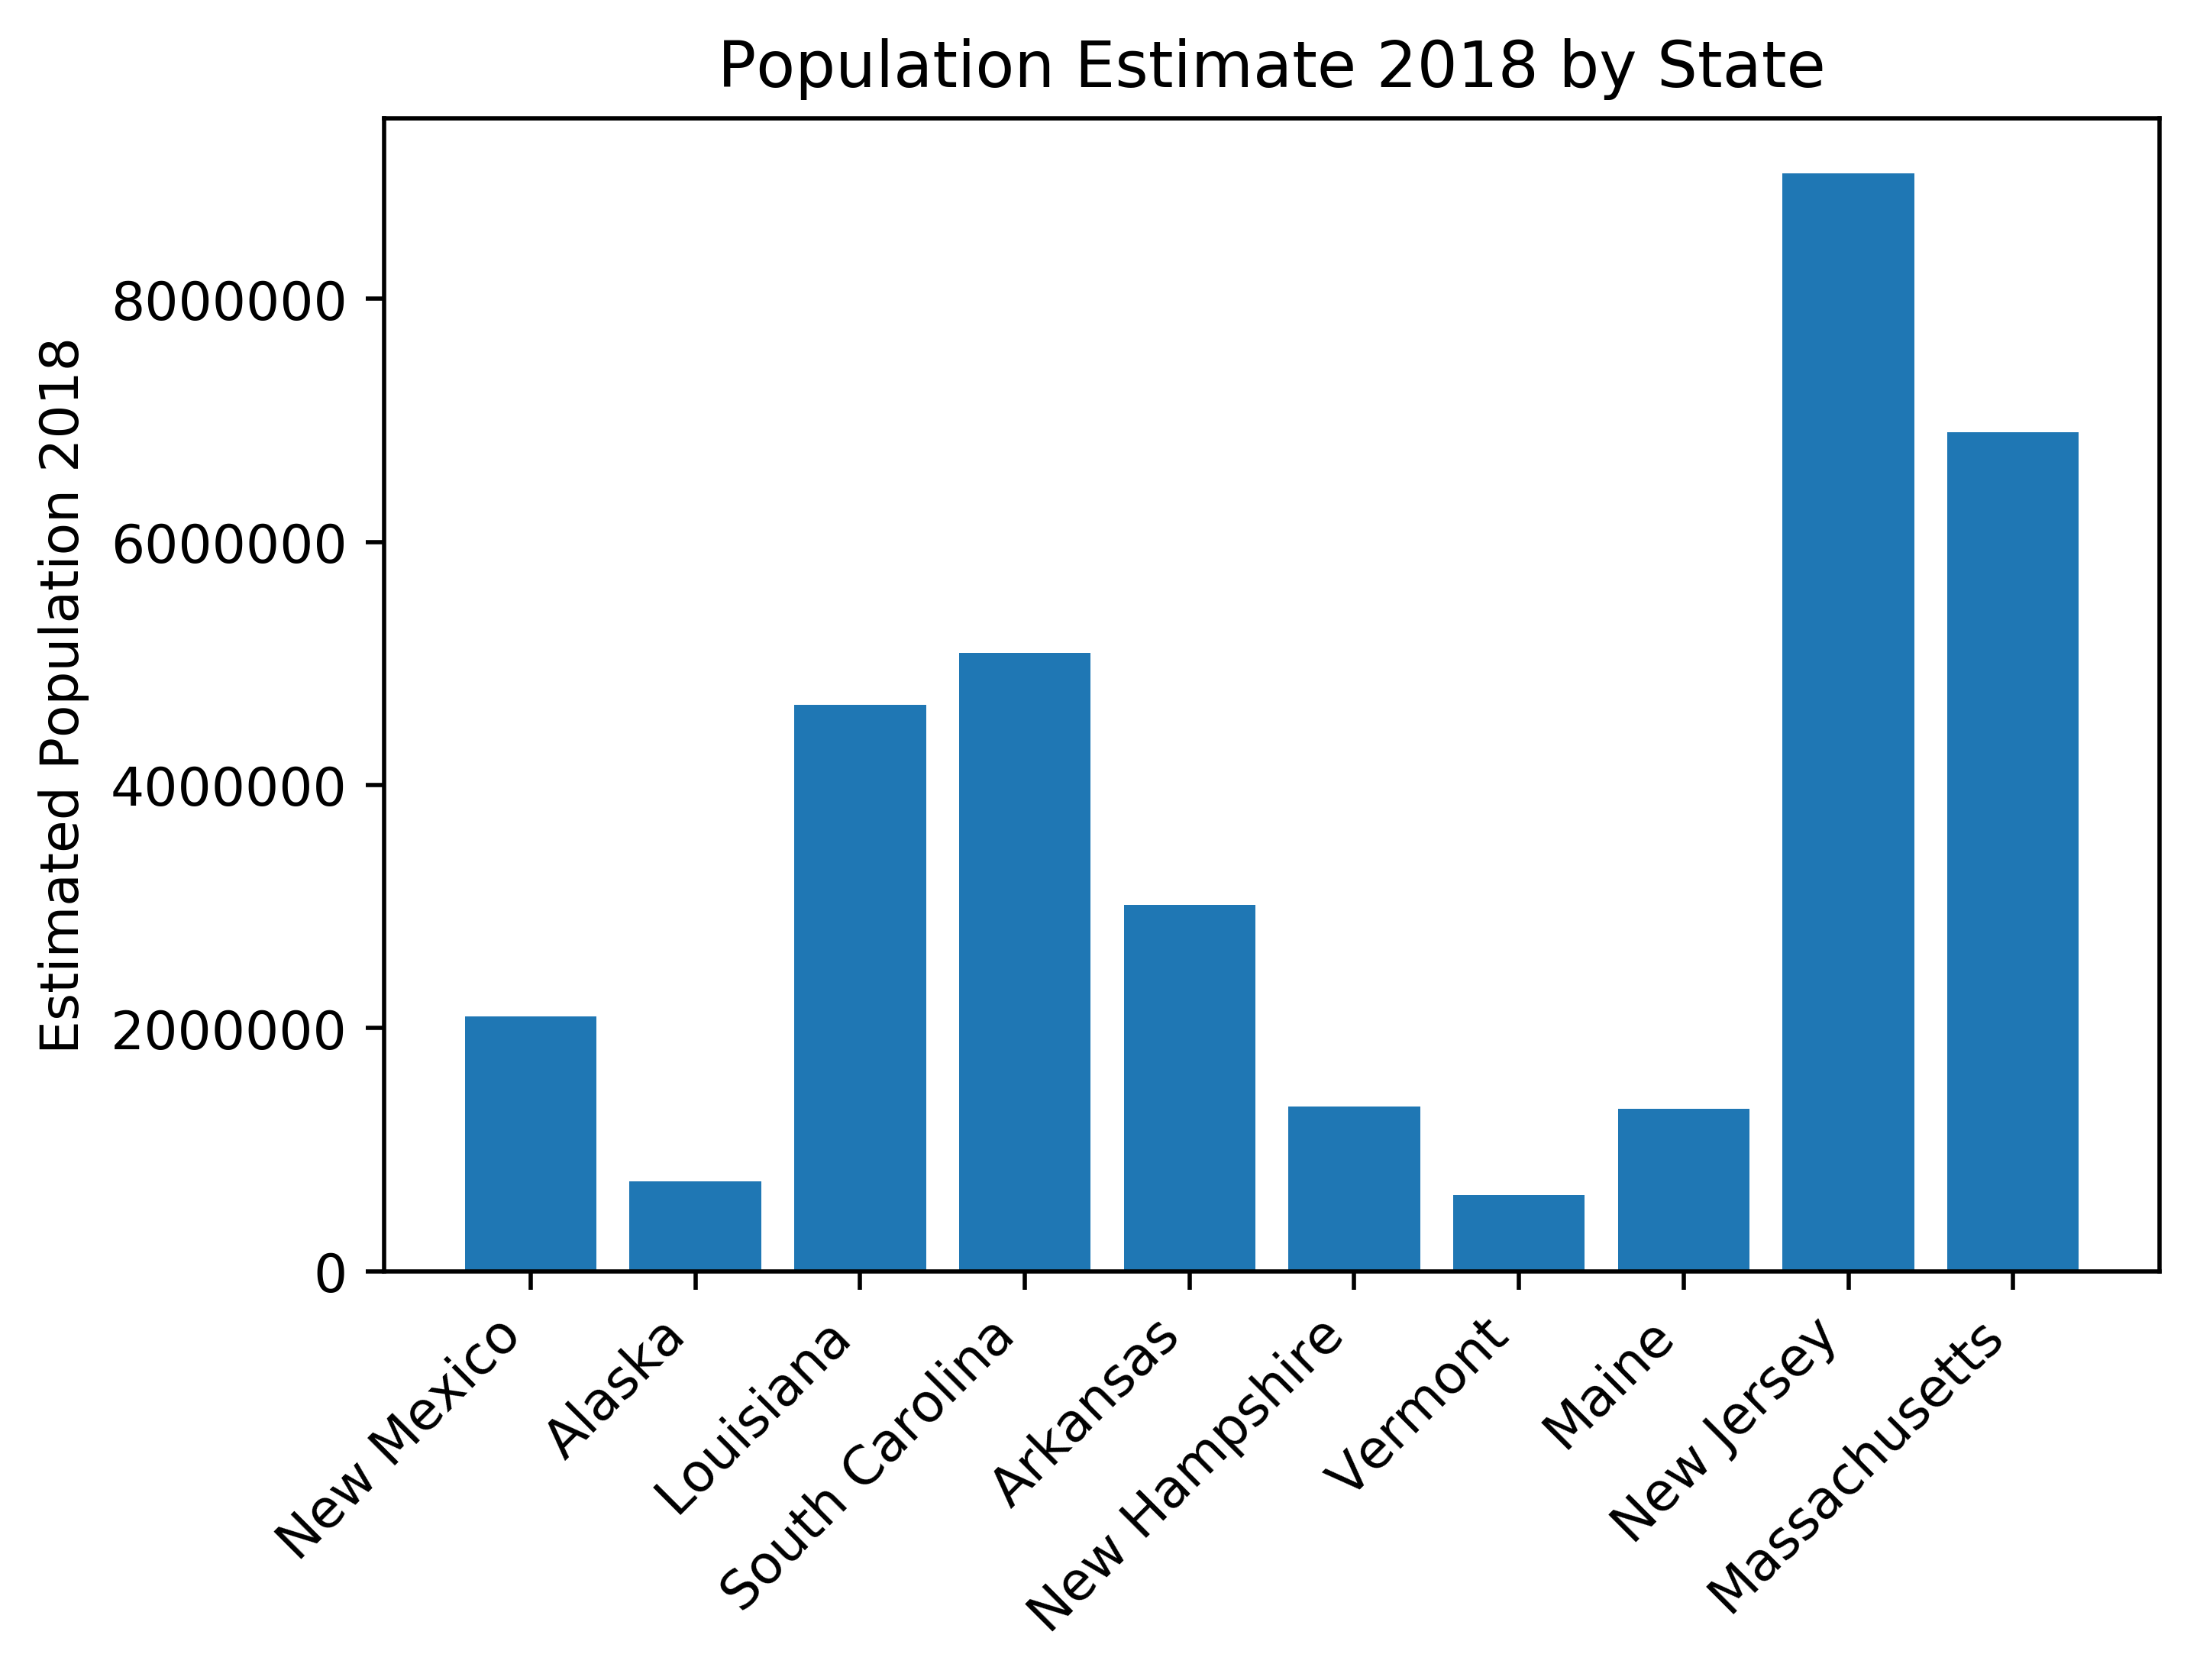

In [3]:
# collect population by county of the following 10 states
# these are the 10 states = ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA'] by population
# imports and froms
import matplotlib.pyplot as plt
import pandas as pd
import wikipedia as wp

# enter the h1 element from the article in wp.page(h1)
# https://en.wikipedia.org/wiki/List of states and territories of the United States by population
html = wp.page("List of states and territories of the United States by population").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html)[0]

# remove unneeded rows and columns
df_drop = df.drop(df.index[52:69])
df_drop = df_drop.drop([29]) 

df_drop = df_drop.drop(columns = ['Rank in the fifty states, 2018', 'Rank in States & Territories', 'Percent increase from 2010-2018[note 1]', 'Total seats in the U.S. House of Representatives, 2013â2023', 'Estimated population per electoral vote, 2018[note 2]', 'Estimated population per House seat, 2018', 'Census population per House seat, 2010', 'Percent of the total U.S. population, 2018[note 3]'])

# convert string to numeric
df_convert1 = df_drop['Population estimate, July 1, 2018[4]'].apply(lambda x: x).astype(int)
df_convert2 = df_drop['Census population, April 1, 2010'].apply(lambda x: x).astype(int)

# combine lists
df_combine = pd.DataFrame(zip(df_drop['Name'], df_convert1, df_convert2))

# rename columns
df_rename = df_combine.rename(columns = {0: 'State', 1: 'Population Estimate 2018', 2:'Population Census 2010'})

# get these states ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA']
state_list = ['New Mexico', 'Alaska', 'Louisiana', 'South Carolina', 'Arkansas', 'New Hampshire', 'Vermont', 'Maine', 'New Jersey', 'Massachusetts']

df_state = df_rename

[df_state[df_state['State'] == state] for state in state_list]

df_state_10 = pd.DataFrame()
for state in state_list:
    df_state_10 = df_state_10.append(df_state[df_state['State'] == state], ignore_index = True)

df_state_final = df_state_10.replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA'])

# sort by state and save a csv
# df_sort_state = df_state_final.sort_values(['Population Estimate 2018'])
df2 = df_state_final
df2.to_csv('10states_by_population_estimate.csv', header=1, index=False)

# plot the data
plt.figure(dpi=500)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style = 'plain')
plt.bar(df2['State'], df2['Population Estimate 2018'])
plt.title('Population Estimate 2018 by State')
plt.ylabel('Estimated Population 2018')
plt.savefig('10population_estimate_state.png', bbox_inches = 'tight')
plt.show()

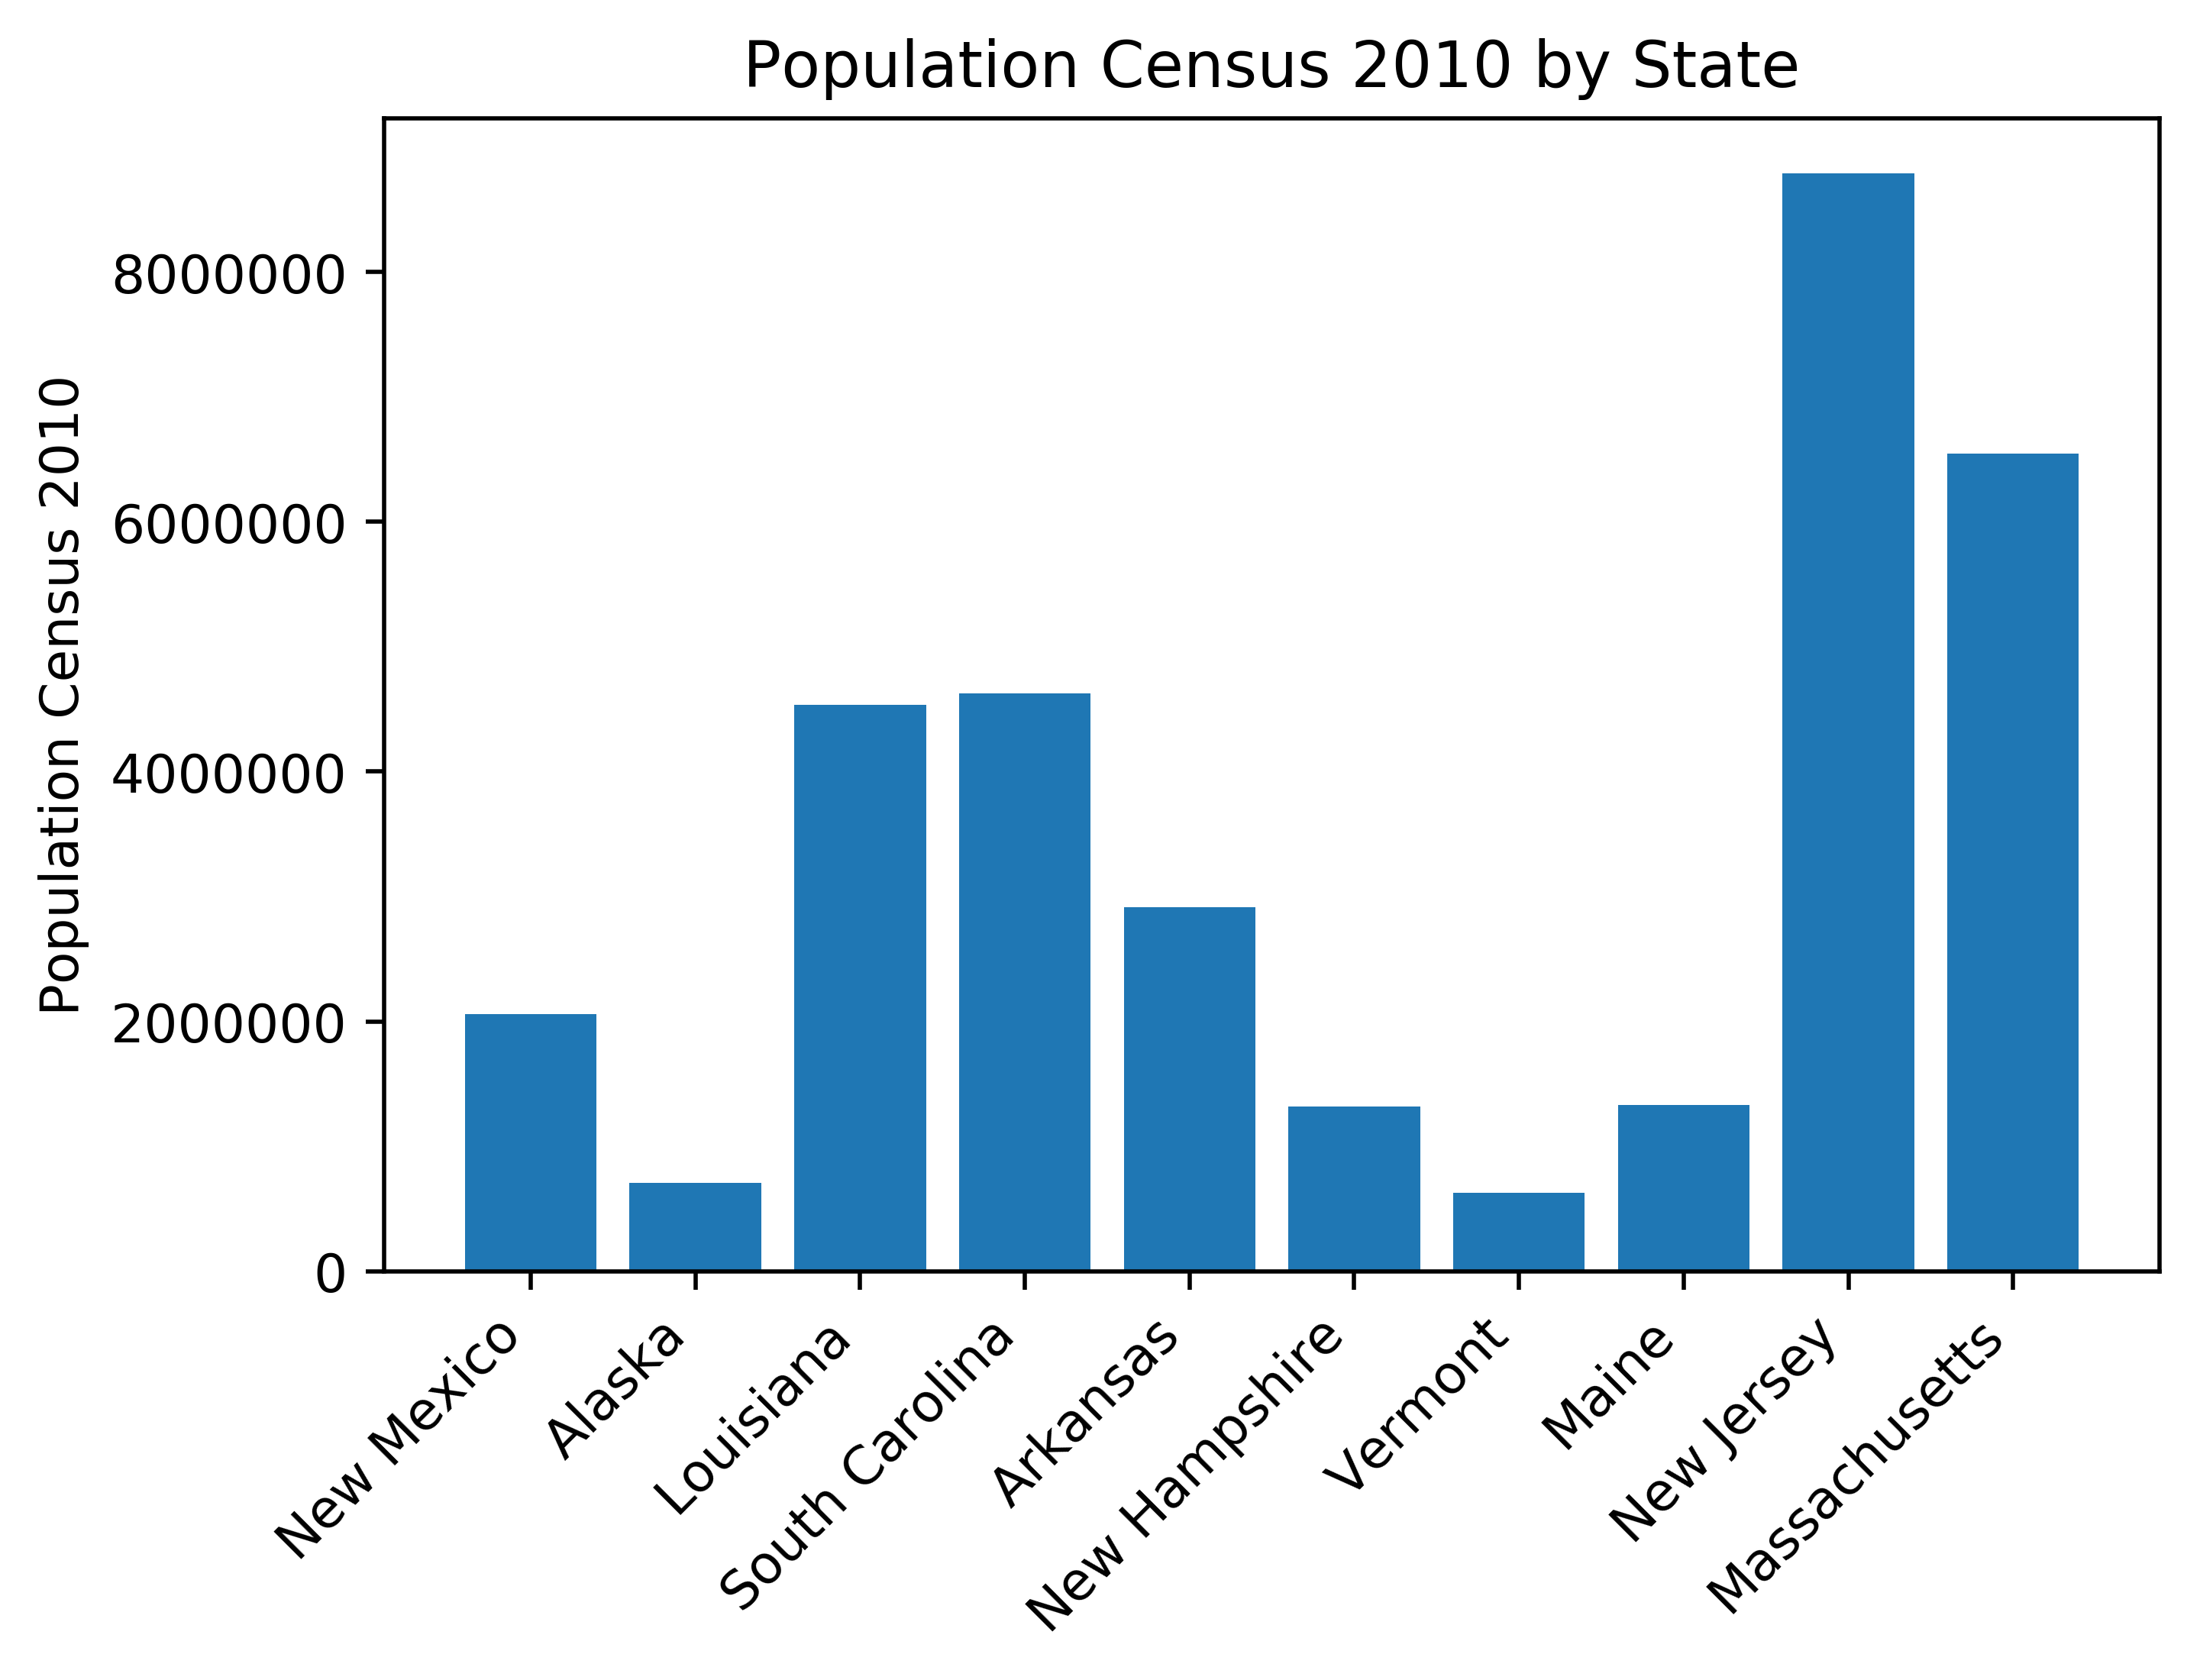

In [5]:
# sort by state and save a csv
# df_sort_state = df_rename.sort_values(['Population Census 2010'])
df2 = df_state_final
df2.to_csv('10states_by_population_census.csv', header=1, index=False)

# plot the data
plt.figure(dpi=500)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style = 'plain')
plt.bar(df2['State'], df2['Population Census 2010'])
plt.title('Population Census 2010 by State')
plt.ylabel('Population Census 2010')
plt.savefig('10population_census_state.png', bbox_inches = 'tight')
plt.show()

In [1]:
# collect population by state
# imports and froms
import matplotlib.pyplot as plt
import pandas as pd
import wikipedia as wp

# enter the h1 element from the article in wp.page(h1)
# https://en.wikipedia.org/wiki/List of states and territories of the United States by population
html = wp.page("List of states and territories of the United States by population").html().encode("UTF-8")

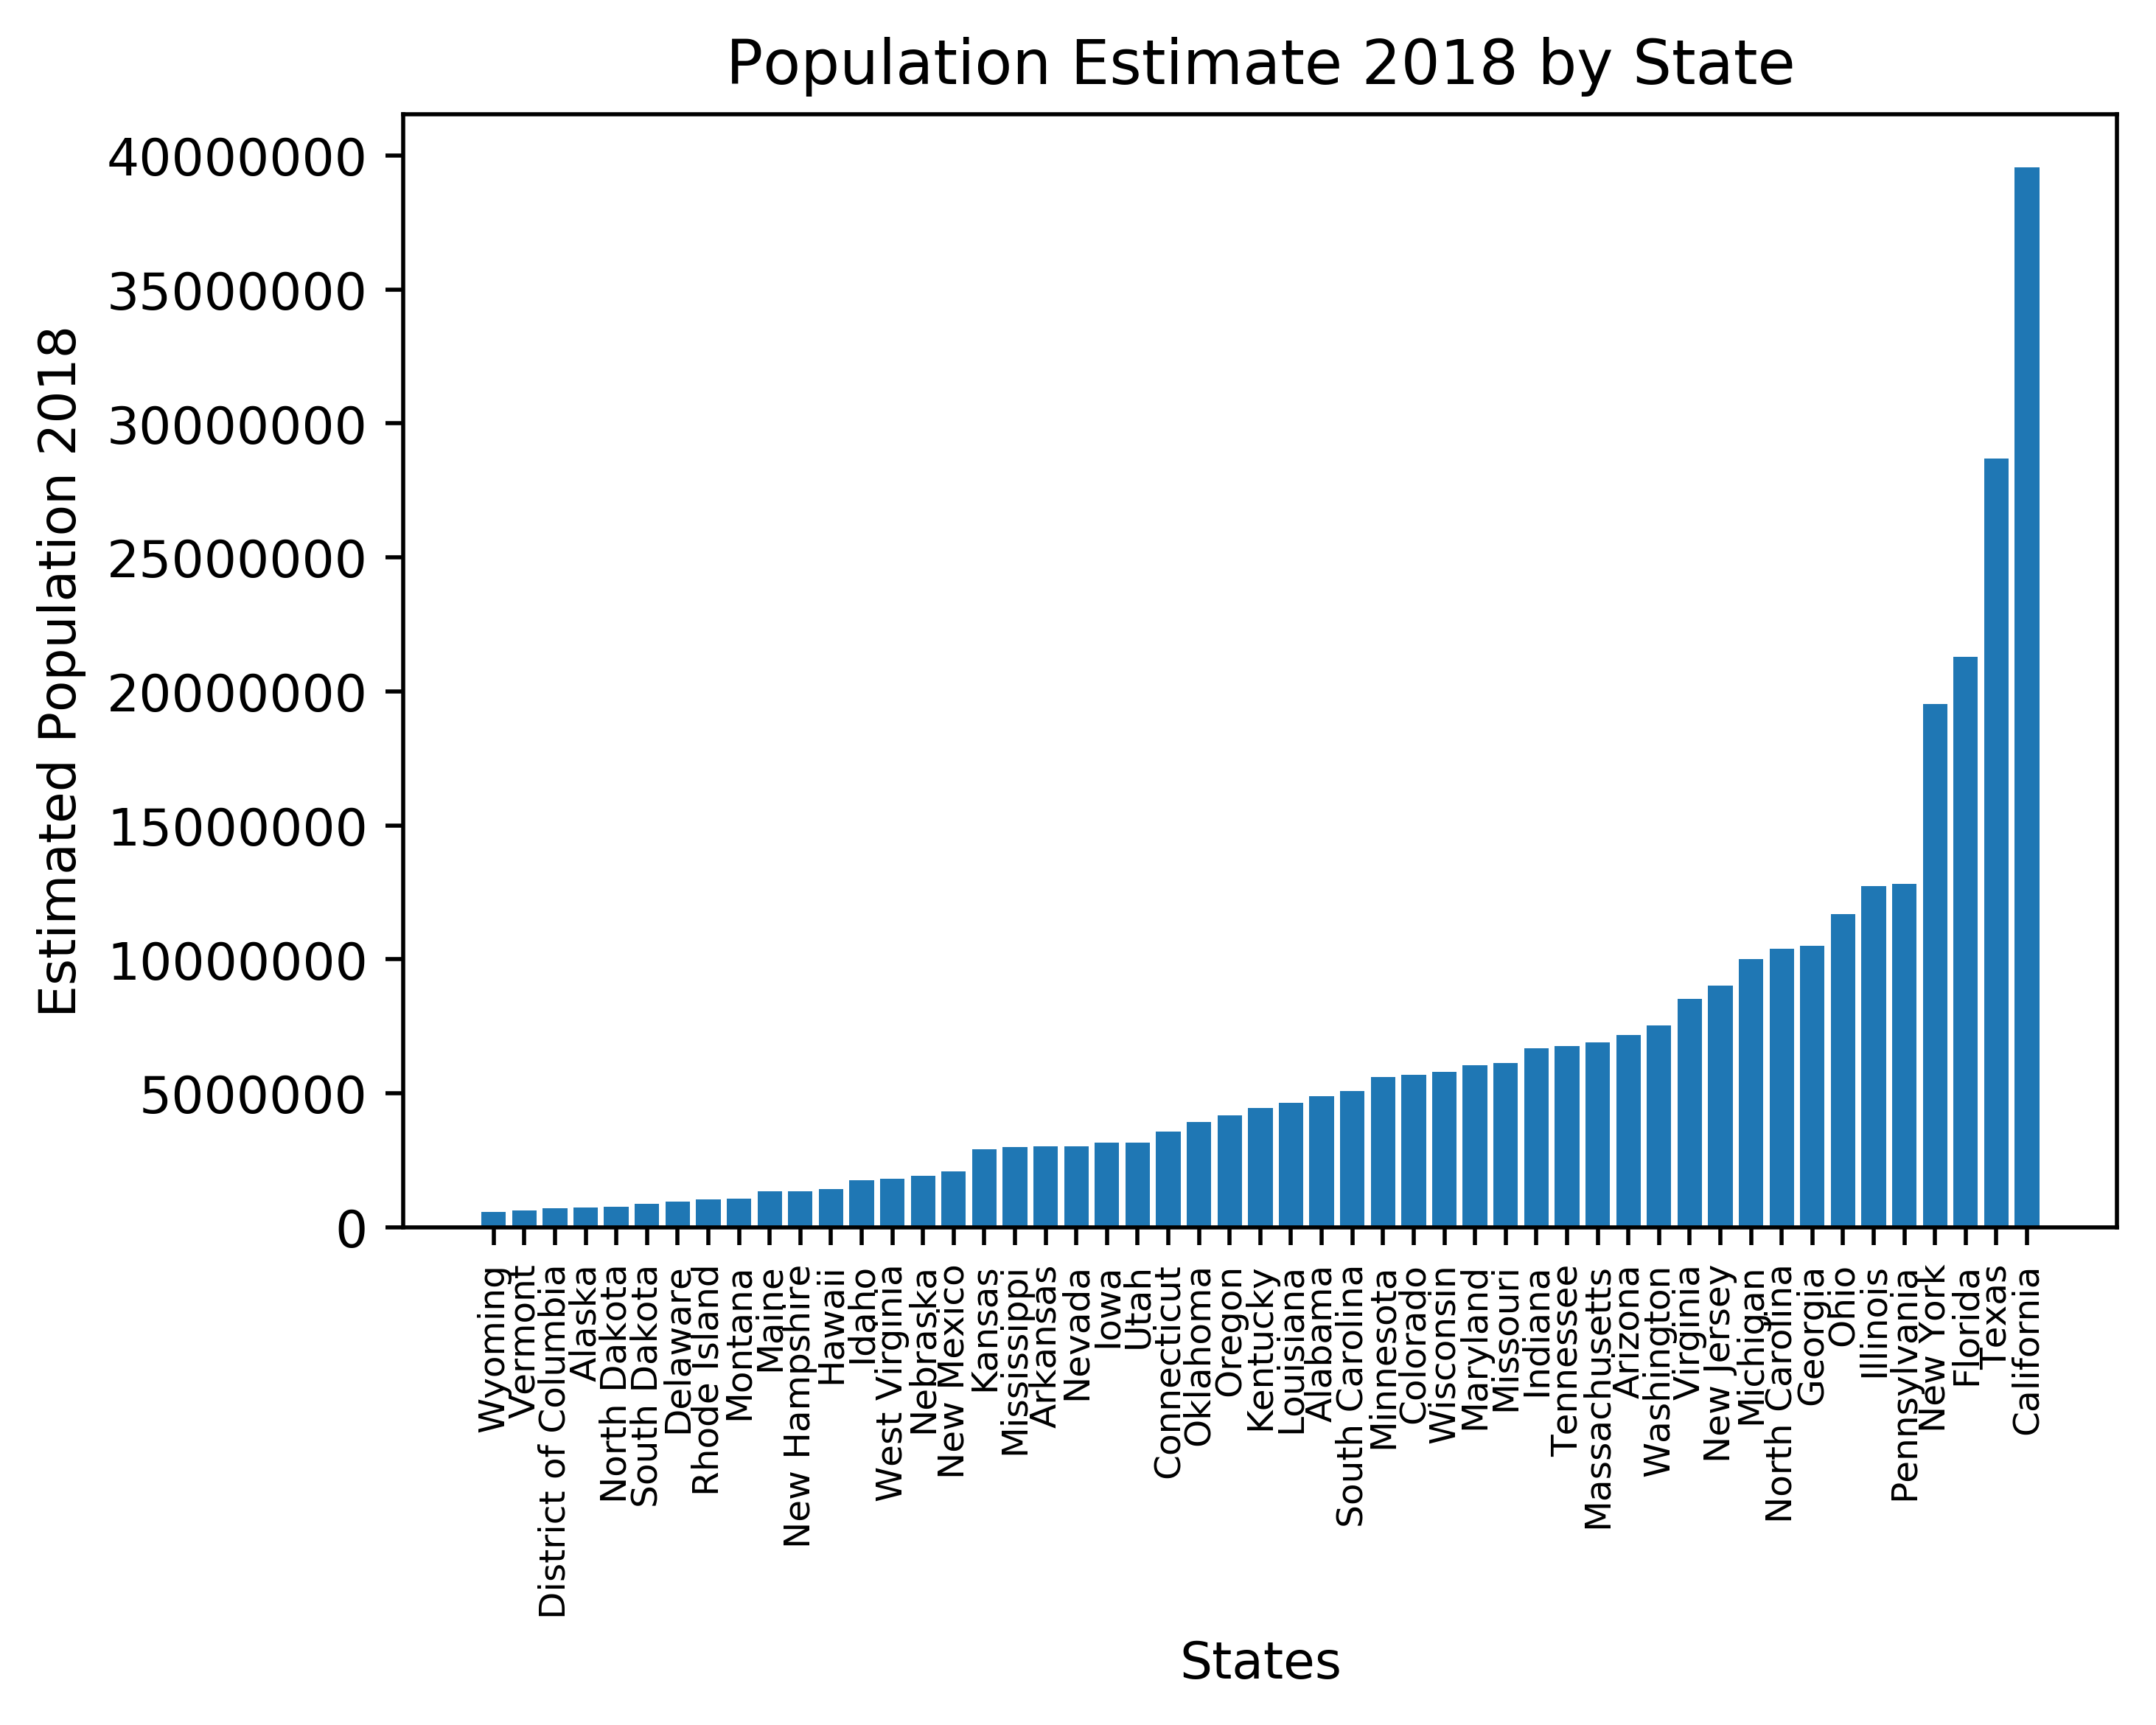

In [2]:
# determine the index of your table
df = pd.read_html(html)[0]

# remove unneeded rows and columns
df_drop = df.drop(df.index[52:69])
df_drop = df_drop.drop([29]) 

df_drop = df_drop.drop(columns = ['Rank in the fifty states, 2018', 'Rank in States & Territories', 'Percent increase from 2010-2018[note 1]', 'Total seats in the U.S. House of Representatives, 2013â2023', 'Estimated population per electoral vote, 2018[note 2]', 'Estimated population per House seat, 2018', 'Census population per House seat, 2010', 'Percent of the total U.S. population, 2018[note 3]'])

# convert string to numeric
df_convert1 = df_drop['Population estimate, July 1, 2018[4]'].apply(lambda x: x).astype(int)
df_convert2 = df_drop['Census population, April 1, 2010'].apply(lambda x: x).astype(int)

# combine lists
df_combine = pd.DataFrame(zip(df_drop['Name'], df_convert1, df_convert2))

# rename columns
df_rename = df_combine.rename(columns = {0: 'State', 1: 'Population Estimate 2018', 2:'Population Census 2010'})

# sort by state and save a csv
df_sort_state = df_rename.sort_values(['Population Estimate 2018'])
df2 = df_sort_state
df2.to_csv('states_by_population_estimate.csv', header=1, index=False)

# plot the data
plt.figure(dpi=500)
plt.xticks(rotation=90, fontsize=7)
plt.ticklabel_format(style = 'plain')
plt.bar(df2['State'], df2['Population Estimate 2018'])
plt.title('Population Estimate 2018 by State')
plt.xlabel('States')
plt.ylabel('Estimated Population 2018')
plt.savefig('population_estimate_state.png', bbox_inches = 'tight')
plt.show()

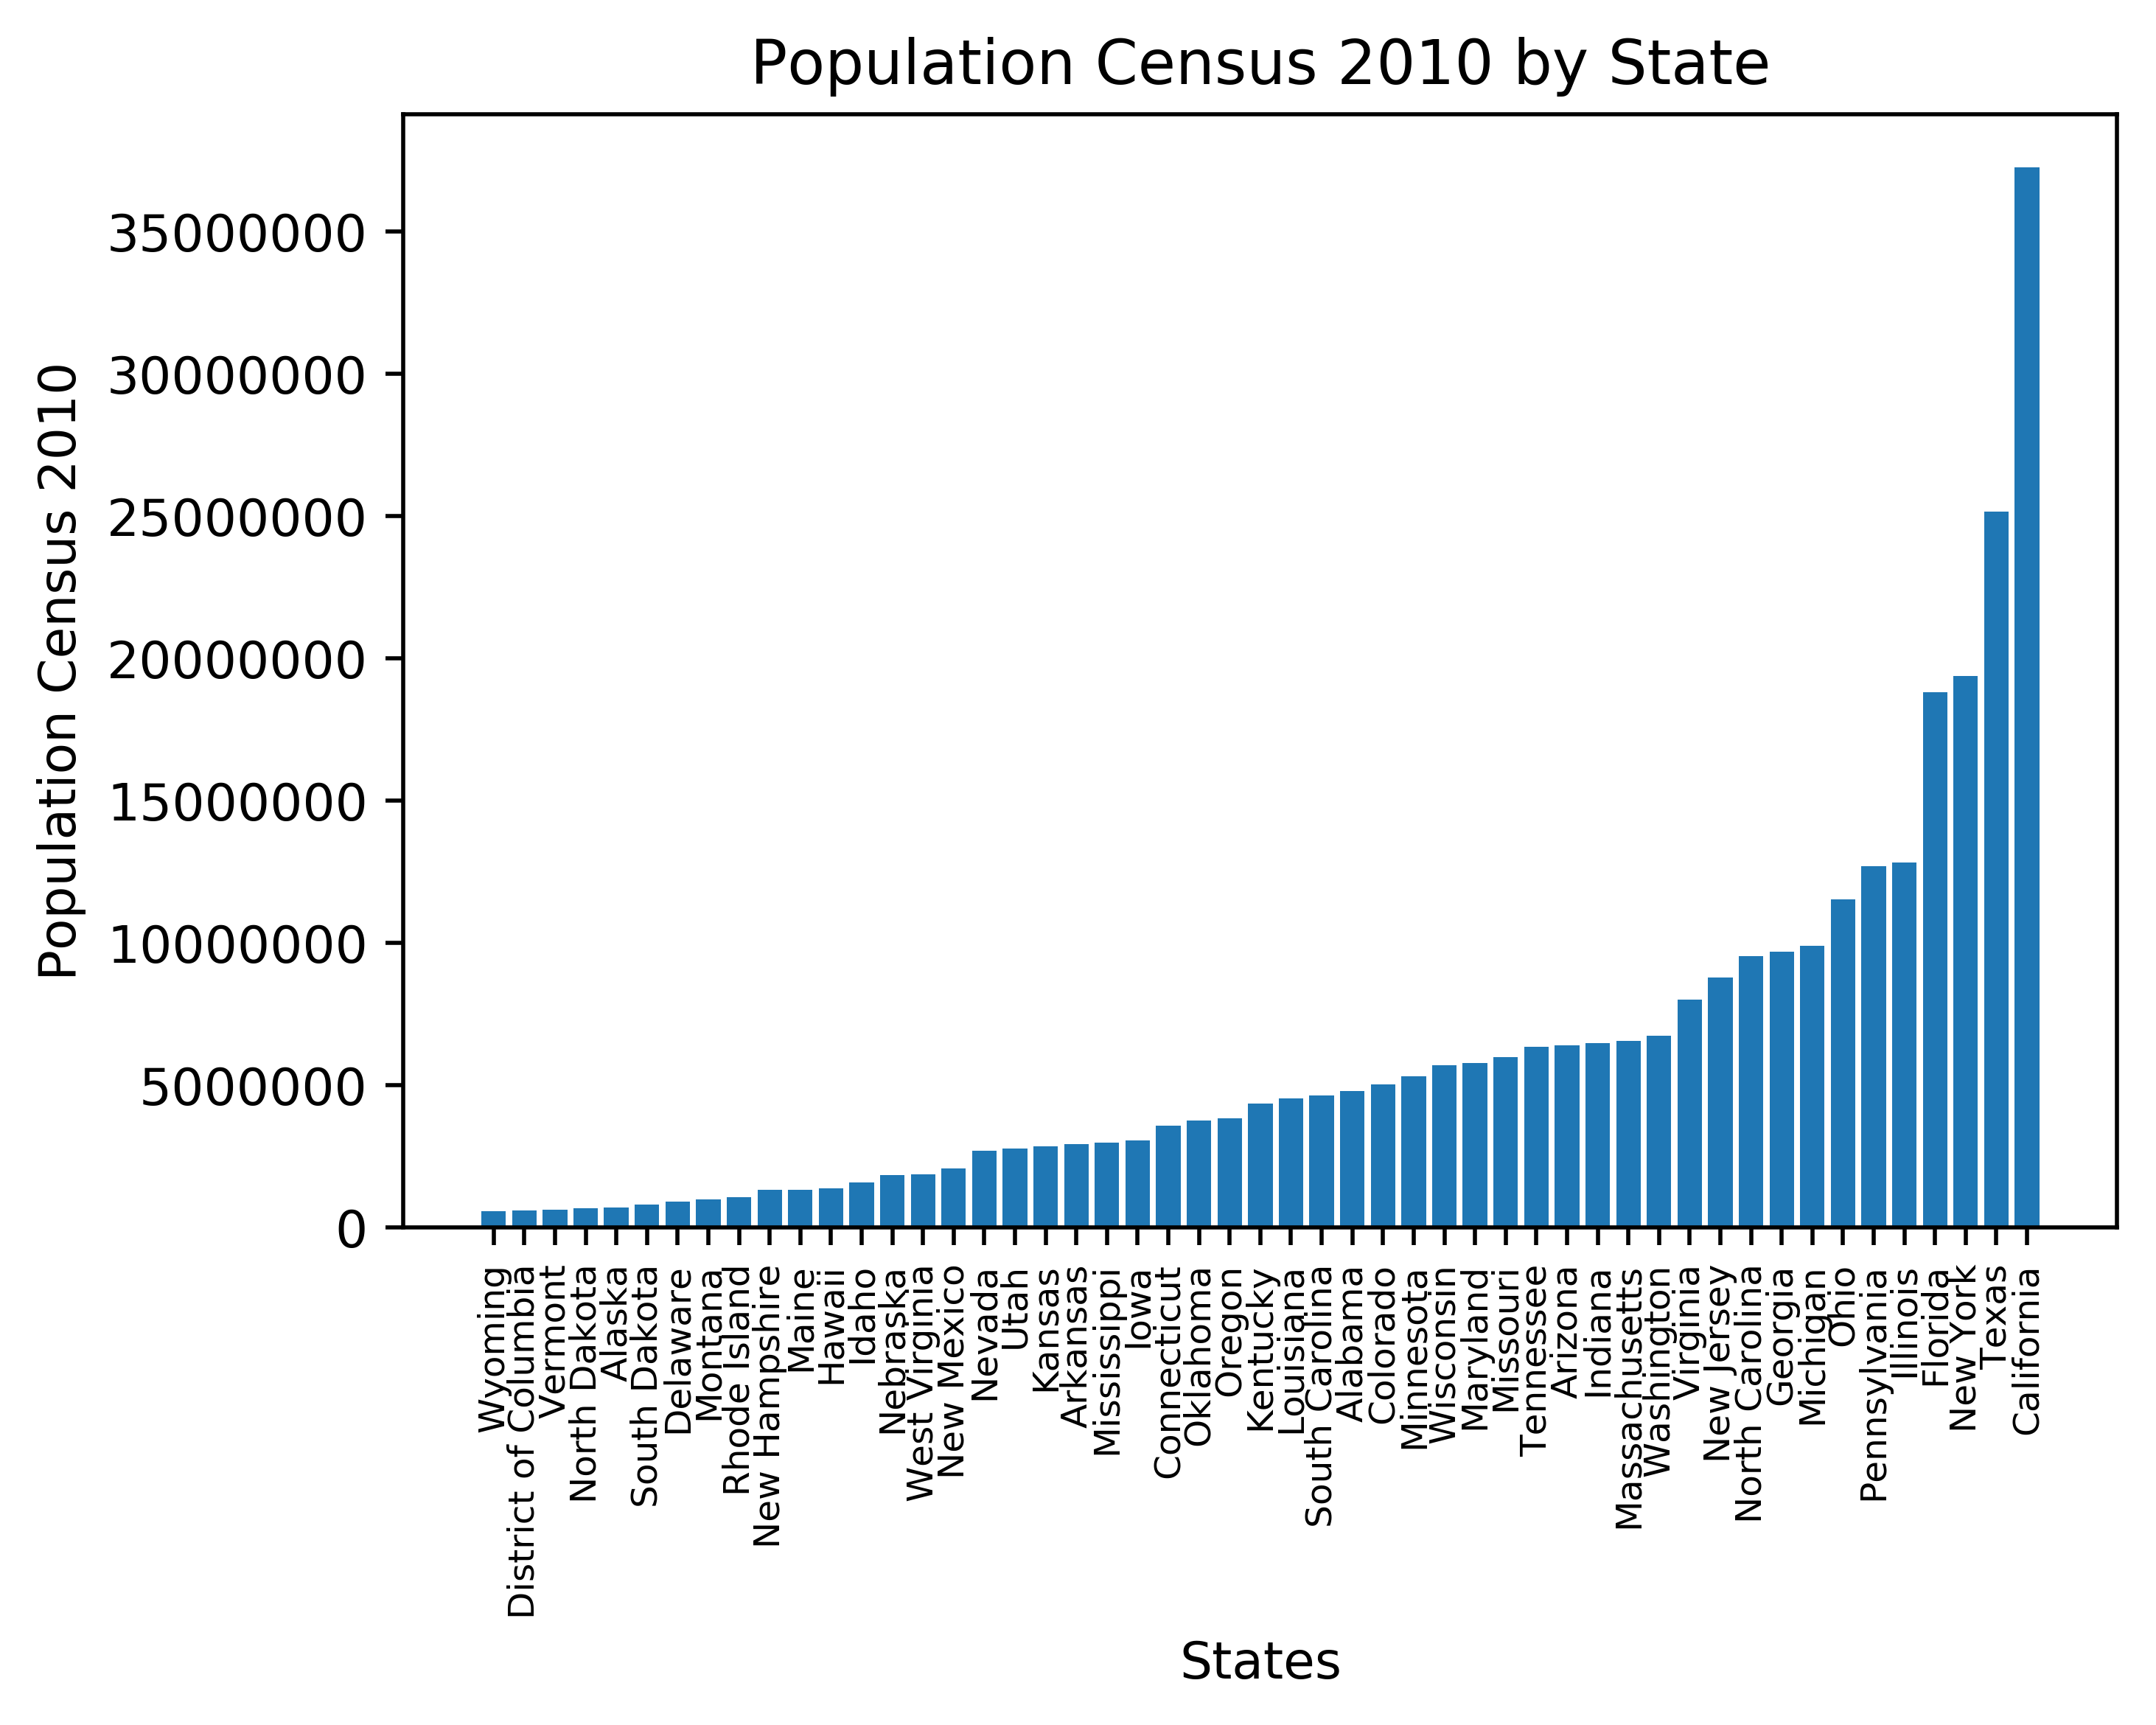

In [3]:
# sort by state and save a csv
df_sort_state = df_rename.sort_values(['Population Census 2010'])
df2 = df_sort_state
df2.to_csv('states_by_population_census.csv', header=1, index=False)

# plot the data
plt.figure(dpi=500)
plt.xticks(rotation=90, fontsize=7)
plt.ticklabel_format(style = 'plain')
plt.bar(df2['State'], df2['Population Census 2010'])
plt.title('Population Census 2010 by State')
plt.xlabel('States')
plt.ylabel('Population Census 2010')
plt.savefig('population_census_state.png')
plt.show()

# Collecting Unemployment Data

In [2]:
# collect unemployment by county 
# imports and froms
import pandas as pd
df = pd.read_csv('laucnty17.csv')

# remove unneeded rows and columns
df_drop = df.drop(df.index[3224:3227])
df_drop = df.drop(df_drop.index[0:5])
df_drop = df_drop.drop(columns = ['Labor Force Data by County, 2017 Annual Averages', 'Unnamed: 1', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8' ])
df_drop = df_drop.dropna()

# convert string to numeric
df_convert1 = df_drop['Unnamed: 2'].apply(lambda x: x).astype(int)
df_convert2 = df_drop['Unnamed: 9'].apply(lambda x: x).astype(float)

# split county/state into county and state
df_split1 = list(df_drop['Unnamed: 3'].str.split(', ').str[0])
df_split2 = list(df_drop['Unnamed: 3'].str.split(', ').str[1])

# combine lists
df_combine = pd.DataFrame(zip(df_convert1, df_split1, df_split2, df_convert2))

# rename columns
df_rename = df_combine.rename(columns = {0: 'FIPS', 1: 'County', 2: 'State', 3:'Unemployment Rate'})

# save csv
df_rename.to_csv('county_state_by_unemployment_rate.csv', header=1, index=False)

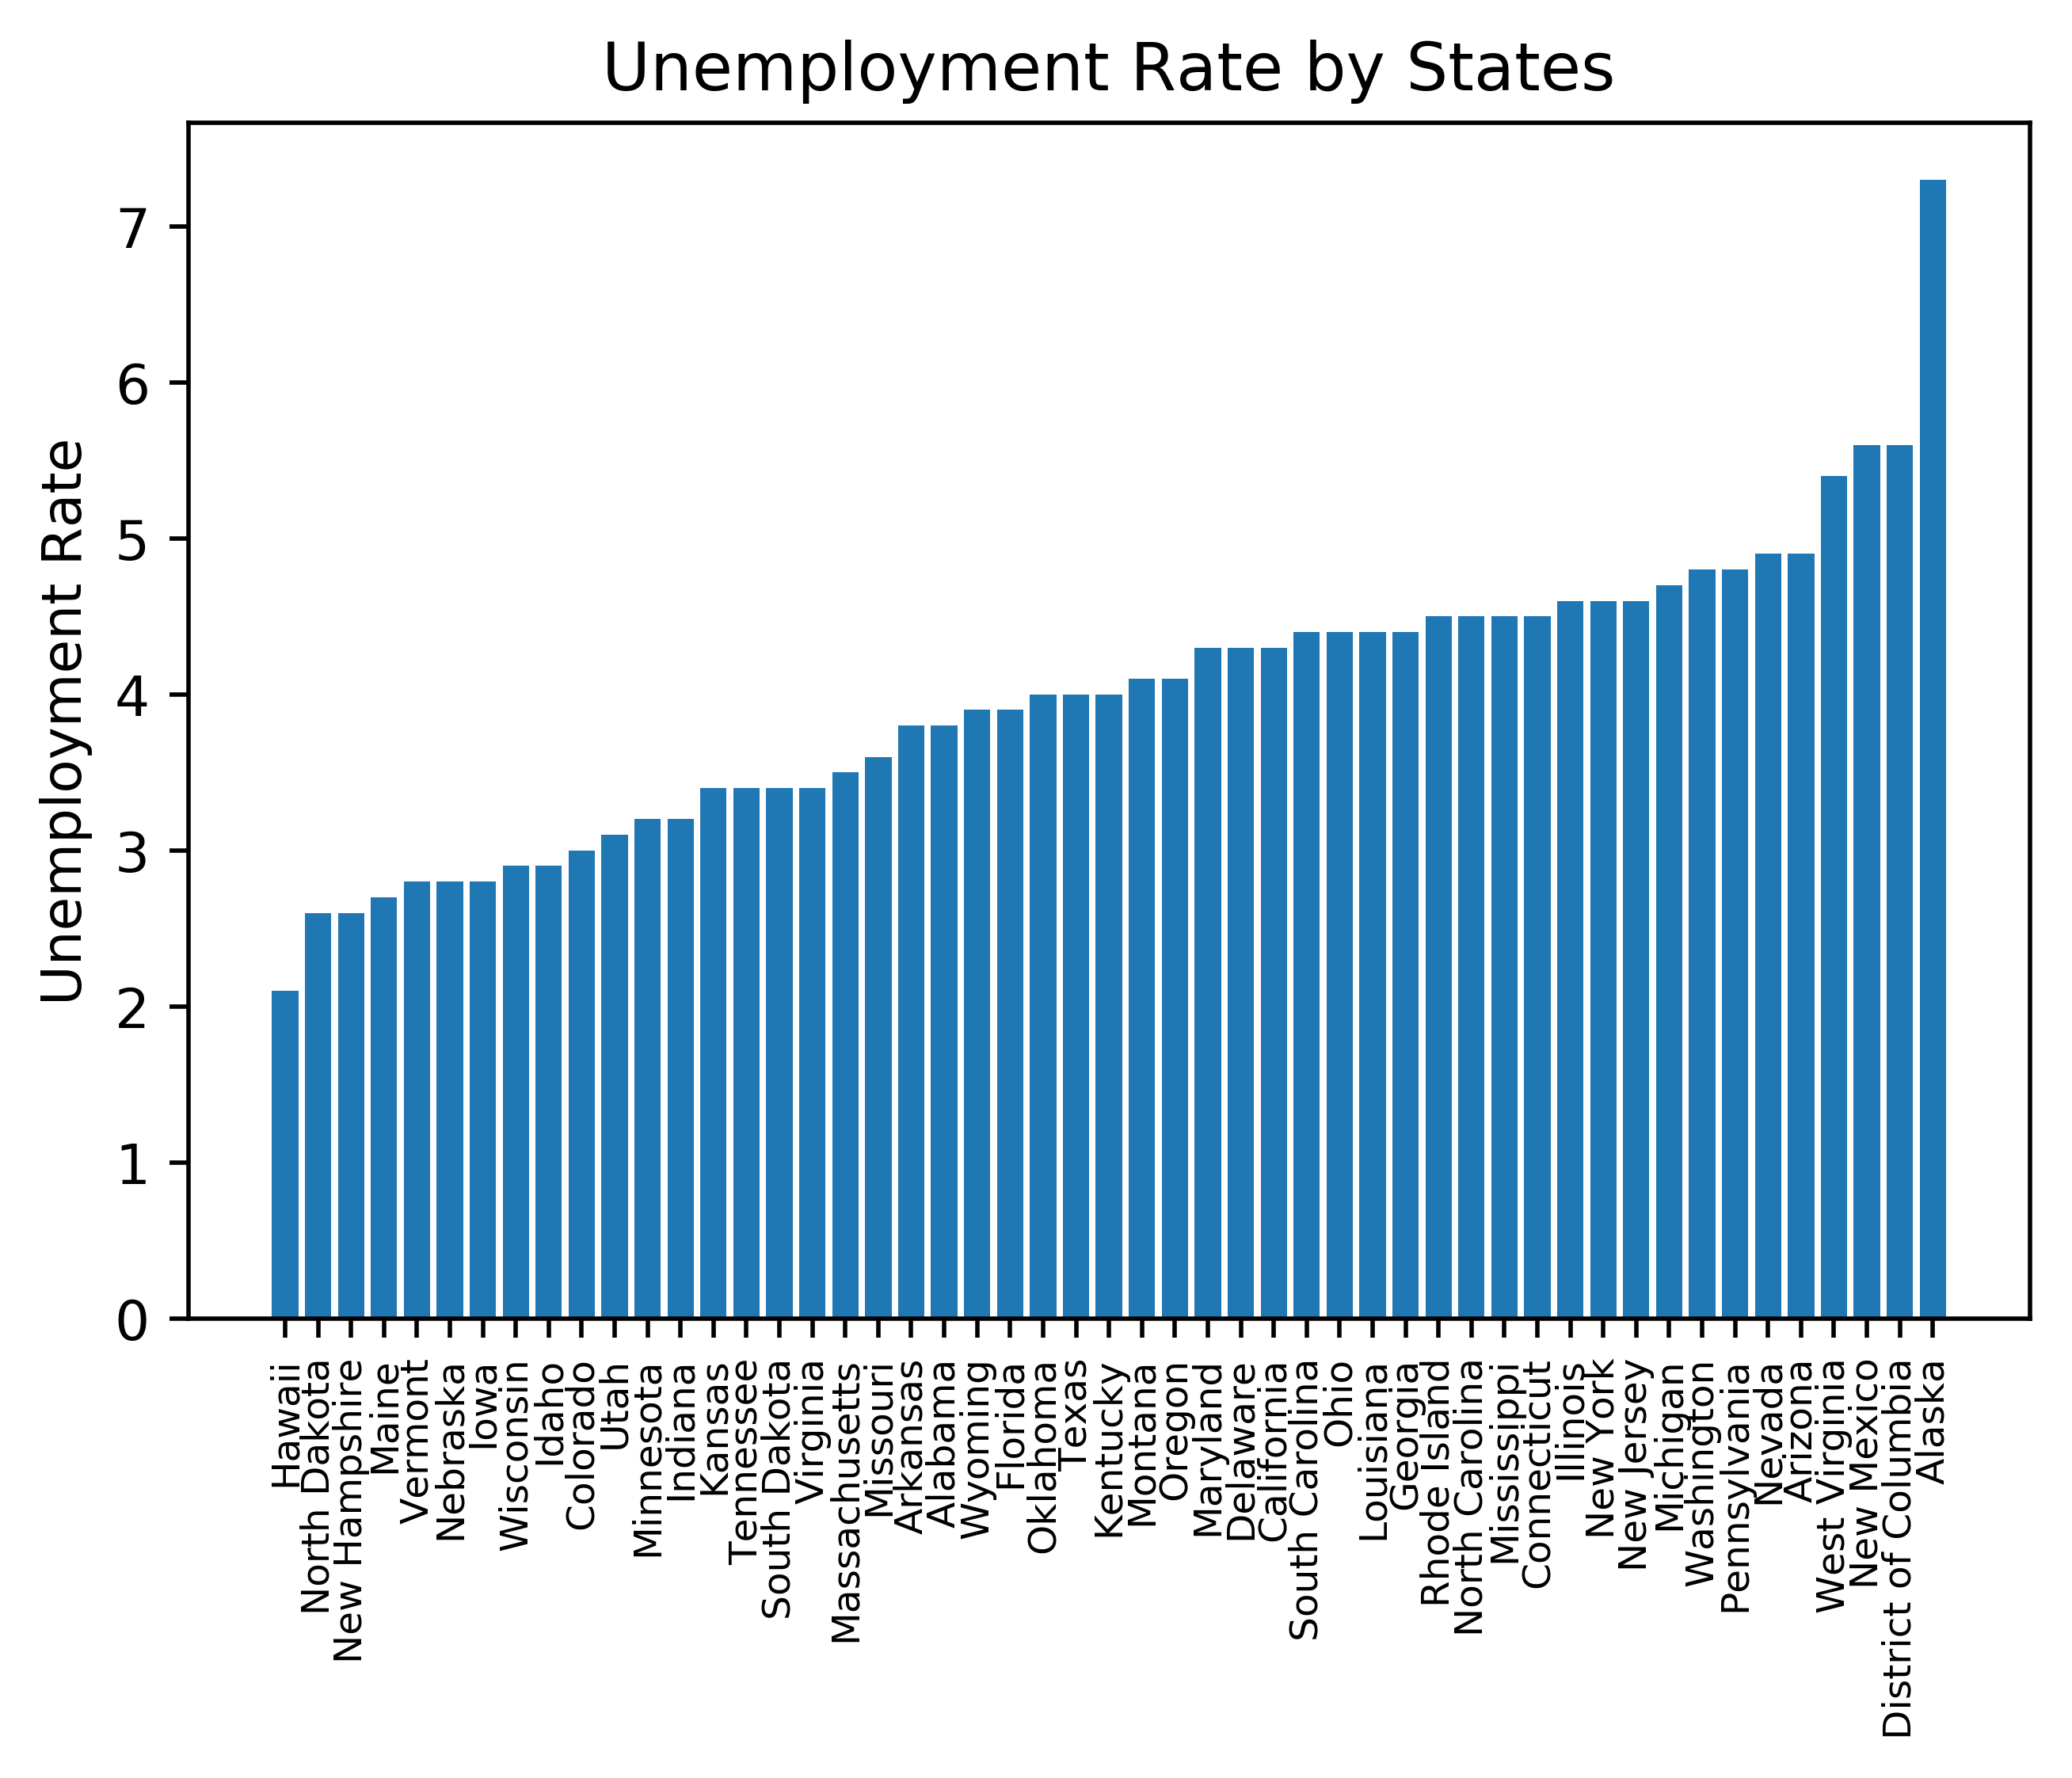

In [4]:
# collect unemployment by state
# imports and froms
import matplotlib.pyplot as plt
import pandas as pd
import wikipedia as wp

# enter the h1 element from the article in wp.page(h1)
# https://en.wikipedia.org/wiki/List of U.S. states and territories by unemployment rate

html = wp.page("List of U.S. states and territories by unemployment rate").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html)[0]

# remove unneeded rows and columns
df_drop = df.drop([0, 1, 2, 3, 21])
df_drop = df_drop.drop(columns = ['Rank', 'Rank(50 states)', 'Monthly change (%) (=drop in unemployment)'])

# convert text to numeric
df_convert = df_drop['Unemployment rate (seasonally adjusted)'].apply(lambda x: x.split('%')[0].strip()).astype(float)

# combine lists
df_combine = pd.DataFrame(zip(df_drop['Statefederal district or territory'], df_convert))

# rename columns
df_rename = df_combine.rename(columns = {0: 'State', 1: 'Unemployment'})

# sort by state and save a csv
df_sort_state = df_rename.sort_values(['Unemployment'])
df2 = df_sort_state
df2.to_csv('states_by_unemployment_rate.csv', header=1, index=False)

# plot the data
plt.figure(dpi=500)
plt.xticks(fontsize=7, rotation=90)
plt.bar(df2['State'], df2['Unemployment'])
plt.title('Unemployment Rate by States')
plt.ylabel('Unemployment Rate')
plt.savefig('unemployment_state.png', bbox_inches = 'tight')
plt.show()

# Collecting Median Household Income Data

In [ ]:
# collect median household income
# imports and froms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wikipedia as wp

# enter the h1 element from the article in wp.page(h1)
# https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income
html = wp.page("List of United States counties by per capita income").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html)[1]

# removing blank entries
df_drop = df.dropna(subset = ['Rank', 'County-equivalent'])

# create two dataframes to store state and county, and median income
df_trim =[]
df_trim = df_drop[['State', 'County-equivalent']]
df_trim = df_trim.rename(index=str, columns={'State':'State', 'County-equivalent':'County'})

df_trim2 = []
df_trim2 = df_drop[['Medianfamilyincome']]
df_trim2 = df_trim2.rename(index=str, columns={'Medianfamilyincome':'MedianIncome'})

# convert text to numeric
df_trim2 = df_trim2[df_trim2.columns[0]].replace('[\$,]', '', regex=True).astype(float)

# combine state, county and median data
df_trim['MedianIncome'] = df_trim2

# convert county to lowercase
df_trim['County'] = df_trim['County'].apply(lambda x: x.lower())

# sort by state and save a csv
df_sort_state = df_trim.sort_values(['State'])
df2 = df_sort_state
df2.to_csv('list_of_state_and_counties_by_median_income.csv',header=1,index=False)

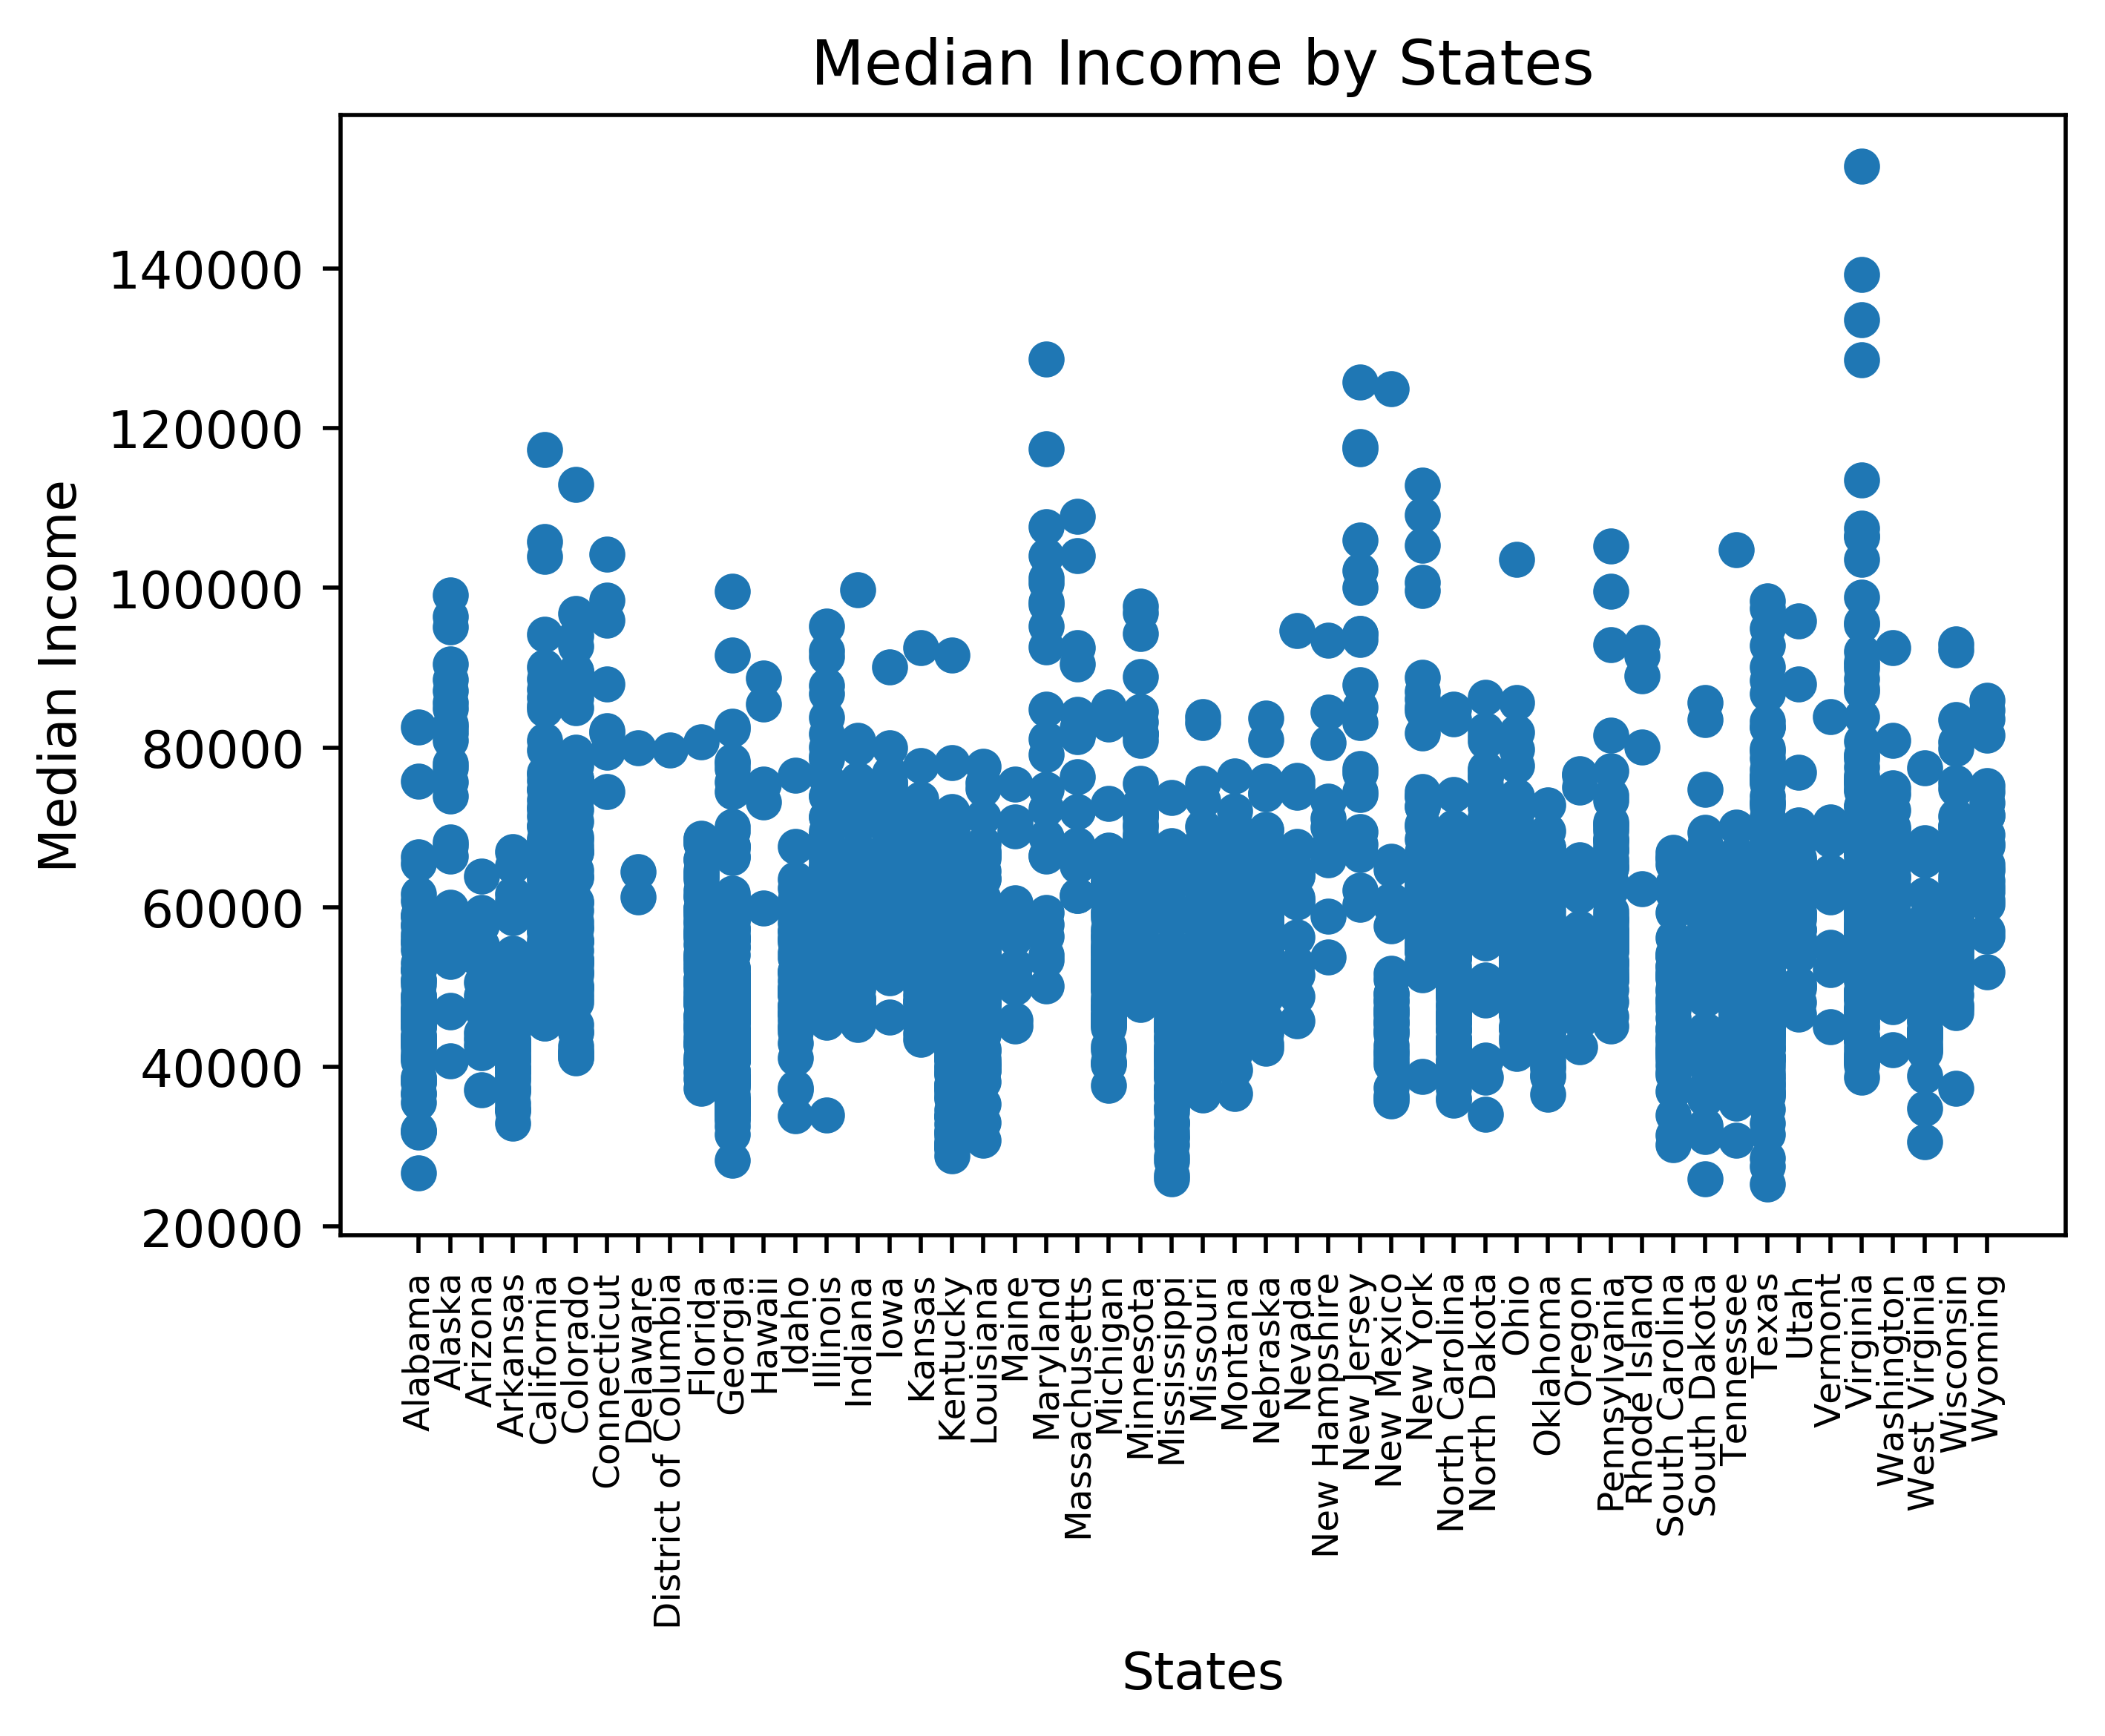

In [34]:
# plot the data
plt.figure(dpi=500)
plt.xticks(rotation=90, fontsize=7)
plt.scatter(df2['State'], df2['MedianIncome'])
plt.title('Median Income by States')
plt.xlabel('States')
plt.ylabel('Median Income')
plt.savefig('median_income_states.png', bbox_inches = 'tight')
plt.show()

# Collecting Gym Data

In [2]:
# collecting gym data
# imports and froms
import pandas as pd
import numpy as np
import requests
import json
import gmaps
import matplotlib.pyplot as plt
import config

# api keys
from config import gkey, ykey

zipcode_data = pd.read_csv ("uszips.csv")
zipcode_data = zipcode_data[["state_id", "zip", "lat", "lng"]]
zipcode_data["gym count"]=""
state_list = ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA']

zipcode_state_data = zipcode_data[(zipcode_data["state_id"].isin(state_list))]

# location = [0]
term = "gym"
headers = {"Authorization": f"Bearer {ykey}"}
yelp_base_url = "https://api.yelp.com/v3/businesses/search"
counter = 0

for index, row in zipcode_state_data.iterrows():
    try:
        zipcode = row["zip"]
        params_yelp = {"location": zipcode,"limit": 50,"term": term,"radius": 5000}
        response_yelp = requests.get(url = yelp_base_url, params = params_yelp, headers = headers)
        data = response_yelp.json()
        total_count = data["total"]
        counter = counter + 1
        print (f"{total_count} from {zipcode}, {counter}")
        zipcode_state_data.loc[index, "gym count"] = total_count
    except:
        print (f"no {zipcode} data")
        continue

no 70801 data
no 88004 data
no 88055 data
no 88262 data
no 29899 data
no 71998 data
no 88421 data
no 87573 data
no 72467 data
no 87735 data
no 8320 data
no 7939 data
no 7820 data
no 2366 data
no 1066 data
no 4944 data
no 72320 data
no 8327 data
no 72168 data
no 70712 data
no 29409 data
no 29904 data
no 70076 data
no 71644 data
no 8314 data
no 1434 data
no 99510 data
no 99519 data
no 87749 data
no 7703 data
no 87731 data
no 72099 data
no 87117 data
no 72325 data
no 87824 data
no 3754 data
no 88255 data
no 29905 data
no 29051 data
no 70442 data
no 8808 data
no 99734 data
no 8640 data
no 70050 data
no 87730 data
no 70519 data
no 4057 data
no 99704 data
no 72528 data
no 29324 data
no 3911 data
no 88103 data
no 2561 data
no 72379 data
no 71340 data
no 71480 data
no 72108 data
no 88424 data
no 4267 data
no 72571 data
no 87722 data
no 1937 data
no 71377 data
no 4975 data
no 99553 data
no 88136 data
no 72663 data
no 87820 data
no 3575 data
no 4227 data
no 71316 data
no 87543 data
no 4343 data


no 99742 data
no 70756 data
no 71048 data
no 29152 data
no 72934 data
no 72533 data
no 72445 data
no 87029 data
no 8001 data
no 7310 data
no 2657 data
no 3255 data
no 3231 data
no 5487 data
no 4275 data
no 4936 data
no 99658 data
no 99659 data
no 70116 data
no 70541 data
no 29439 data
no 87745 data
no 72655 data
no 7732 data
no 7980 data
no 7460 data
no 1050 data
no 2110 data
no 1475 data
no 4970 data
no 4418 data
no 99556 data
no 71430 data
no 71438 data
no 71202 data
no 87510 data
no 8039 data
no 4281 data
no 4941 data
no 4943 data
no 4939 data
no 4460 data
no 4760 data
no 99833 data
no 99573 data
no 99709 data
no 71331 data
no 29133 data
no 29125 data
no 87821 data
no 71841 data
no 29712 data
no 72835 data
no 8345 data
no 8322 data
no 7842 data
no 1005 data
no 5142 data
no 4274 data
no 5042 data
no 5873 data
no 99637 data
no 99627 data
no 71326 data
no 72419 data
no 87729 data
no 7418 data
no 2554 data
no 1561 data
no 1862 data
no 1367 data
no 5341 data
no 5253 data
no 4578 data
no 

no 7439 data
no 1235 data
no 1451 data
no 1850 data
no 1845 data
no 3070 data
no 3264 data
no 5060 data
no 4646 data
no 5819 data
no 5843 data
no 5444 data
no 4449 data
no 4923 data
no 99835 data
no 99501 data
no 99771 data
no 70559 data
no 70583 data
no 29129 data
no 29530 data
no 72950 data
no 88411 data
no 72843 data
no 72628 data
no 87402 data
no 8004 data
no 7502 data
no 7647 data
no 2777 data
no 1010 data
no 2150 data
no 1864 data
no 3465 data
no 4062 data
no 5061 data
no 4256 data
no 4231 data
no 5401 data
no 4607 data
no 3584 data
no 5826 data
no 4216 data
no 4623 data
no 5860 data
no 99624 data
no 99577 data
no 99645 data
no 99769 data
no 70517 data
no 71033 data
no 88301 data
no 29672 data
no 72016 data
no 29661 data
no 8758 data
no 8733 data
no 7885 data
no 7440 data
no 3103 data
no 3801 data
no 3226 data
no 4222 data
no 3860 data
no 5647 data
no 5874 data
no 4471 data
no 99801 data
no 99789 data
no 70394 data
no 70754 data
no 88008 data
no 88023 data
no 29924 data
no 29059 

no 1245 data
no 1803 data
no 1225 data
no 1420 data
no 5301 data
no 5158 data
no 3046 data
no 3904 data
no 3301 data
no 3254 data
no 3882 data
no 5772 data
no 3813 data
no 4917 data
no 5846 data
no 4740 data
no 4750 data
no 70056 data
no 70737 data
no 70817 data
no 71343 data
no 88020 data
no 88005 data
no 88012 data
no 88260 data
no 71671 data
no 71859 data
no 29572 data
no 29105 data
no 29384 data
no 72140 data
no 72126 data
no 72372 data
no 87532 data
no 87415 data
no 8077 data
no 8701 data
no 7748 data
no 8825 data
no 7095 data
no 8830 data
no 7974 data
no 7901 data
no 7932 data
no 7601 data
no 7652 data
no 2790 data
no 2760 data
no 1519 data
no 2461 data
no 2468 data
no 1520 data
no 1452 data
no 1801 data
no 1824 data
no 1430 data
no 1340 data
no 3057 data
no 3848 data
no 5359 data
no 3825 data
no 3839 data
no 3263 data
no 4076 data
no 5071 data
no 3849 data
no 4258 data
no 5842 data
no 4438 data
no 4479 data
no 99550 data
no 99674 data
no 99676 data
no 70373 data
no 70084 data
no

no 29349 data
no 72840 data
no 72153 data
no 72661 data
no 8202 data
no 8201 data
no 8081 data
no 8752 data
no 8816 data
no 8872 data
no 8827 data
no 7950 data
no 7840 data
no 7604 data
no 7675 data
no 2723 data
no 2766 data
no 1516 data
no 2038 data
no 1089 data
no 1602 data
no 1760 data
no 2464 data
no 1532 data
no 1752 data
no 2176 data
no 1072 data
no 1940 data
no 1841 data
no 3110 data
no 3457 data
no 3861 data
no 3605 data
no 5152 data
no 3867 data
no 4090 data
no 3218 data
no 5743 data
no 4573 data
no 3846 data
no 5858 data
no 4667 data
no 4912 data
no 4668 data
no 4424 data
no 99641 data
no 99773 data
no 70535 data
no 70554 data
no 70438 data
no 71360 data
no 29438 data
no 71043 data
no 71758 data
no 71845 data
no 29510 data
no 87823 data
no 29101 data
no 71953 data
no 29673 data
no 72350 data
no 72425 data
no 8341 data
no 8070 data
no 8056 data
no 8053 data
no 8030 data
no 8068 data
no 8527 data
no 8520 data
no 8844 data
no 7059 data
no 7646 data
no 7624 data
no 7677 data
no 7

no 7470 data
no 7656 data
no 7645 data
no 2713 data
no 2557 data
no 2771 data
no 2375 data
no 2332 data
no 2301 data
no 1902 data
no 3583 data
no 5661 data
no 4496 data
no 4427 data
no 4637 data
no 70125 data
no 70755 data
no 70465 data
no 70789 data
no 71247 data
no 71275 data
no 29446 data
no 88340 data
no 29628 data
no 29545 data
no 29325 data
no 29014 data
no 29669 data
no 29742 data
no 72025 data
no 72326 data
no 72801 data
no 87752 data
no 8108 data
no 8850 data
no 7041 data
no 7054 data
no 7004 data
no 7082 data
no 7627 data
no 2739 data
no 2745 data
no 2767 data
no 2762 data
no 2072 data
no 1097 data
no 1524 data
no 1915 data
no 3858 data
no 3044 data
no 3045 data
no 4107 data
no 5770 data
no 4069 data
no 4240 data
no 4572 data
no 4681 data
no 4609 data
no 4221 data
no 4937 data
no 5845 data
no 4473 data
no 99644 data
no 70002 data
no 70647 data
no 70654 data
no 88044 data
no 88048 data
no 71045 data
no 29906 data
no 29576 data
no 88316 data
no 29070 data
no 29127 data
no 29016

no 72112 data
no 72414 data
no 87557 data
no 72715 data
no 7112 data
no 7420 data
no 1570 data
no 3741 data
no 70807 data
no 29568 data
no 29161 data
no 72022 data
no 72945 data
no 72521 data
no 72464 data
no 7764 data
no 2333 data
no 1507 data
no 1033 data
no 2467 data
no 1863 data
no 1951 data
no 1950 data
no 4762 data
no 99693 data
no 71336 data
no 88046 data
no 29456 data
no 71753 data
no 72114 data
no 29726 data
no 87511 data
no 72611 data
no 7106 data
no 7024 data
no 2130 data
no 1267 data
no 5841 data
no 5839 data
no 99677 data
no 70114 data
no 71410 data
no 71129 data
no 29450 data
no 29039 data
no 29032 data
no 87552 data
no 87421 data
no 8690 data
no 7878 data
no 2493 data
no 1240 data
no 1373 data
no 3862 data
no 3746 data
no 70039 data
no 70390 data
no 29923 data
no 29471 data
no 29150 data
no 71833 data
no 72210 data
no 87326 data
no 87743 data
no 7921 data
no 2639 data
no 2559 data
no 2189 data
no 99751 data
no 71654 data
no 29555 data
no 71643 data
no 72055 data
no 71973

In [3]:
zipcode_state_data.to_csv("zipcode gym count.csv")
zipcode_gym_data = pd.read_csv ("./zipcode gym count.csv")
zipcode_gym_data.head()

,Unnamed: 0,state_id,zip,lat,lng,gym count
0,7,LA,70801,30.4497,-91.1859,NaN
1,15,NM,88004,32.2231,-106.9874,NaN
2,17,NM,88055,32.7382,-108.7339,NaN
3,20,NM,88262,33.1329,-103.4259,NaN
4,22,SC,29899,33.9279,-82.2507,NaN


In [6]:
fig = gmaps.figure()
locations = zipcode_gym_data[["lat", "lng"]].astype(float)
gym_count = zipcode_gym_data["gym count"].astype(float)
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=gym_count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 0.5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [4]:
gym_count = []
for state in state_list:
    zipcode_state_data = zipcode_gym_data[(zipcode_gym_data["state_id"]==state)].sum()["gym count"]
    gym_count.append(zipcode_state_data)

gym_count_sate = pd.DataFrame({"State": state_list, "Total Gym Count": gym_count})
gym_count_sate

,State,Total Gym Count
0,NM,60.0
1,AK,4.0
2,LA,296.0
3,SC,226.0
4,AR,45.0
5,NH,2107.0
6,VT,1676.0
7,ME,5379.0
8,NJ,2051.0
9,MA,5693.0


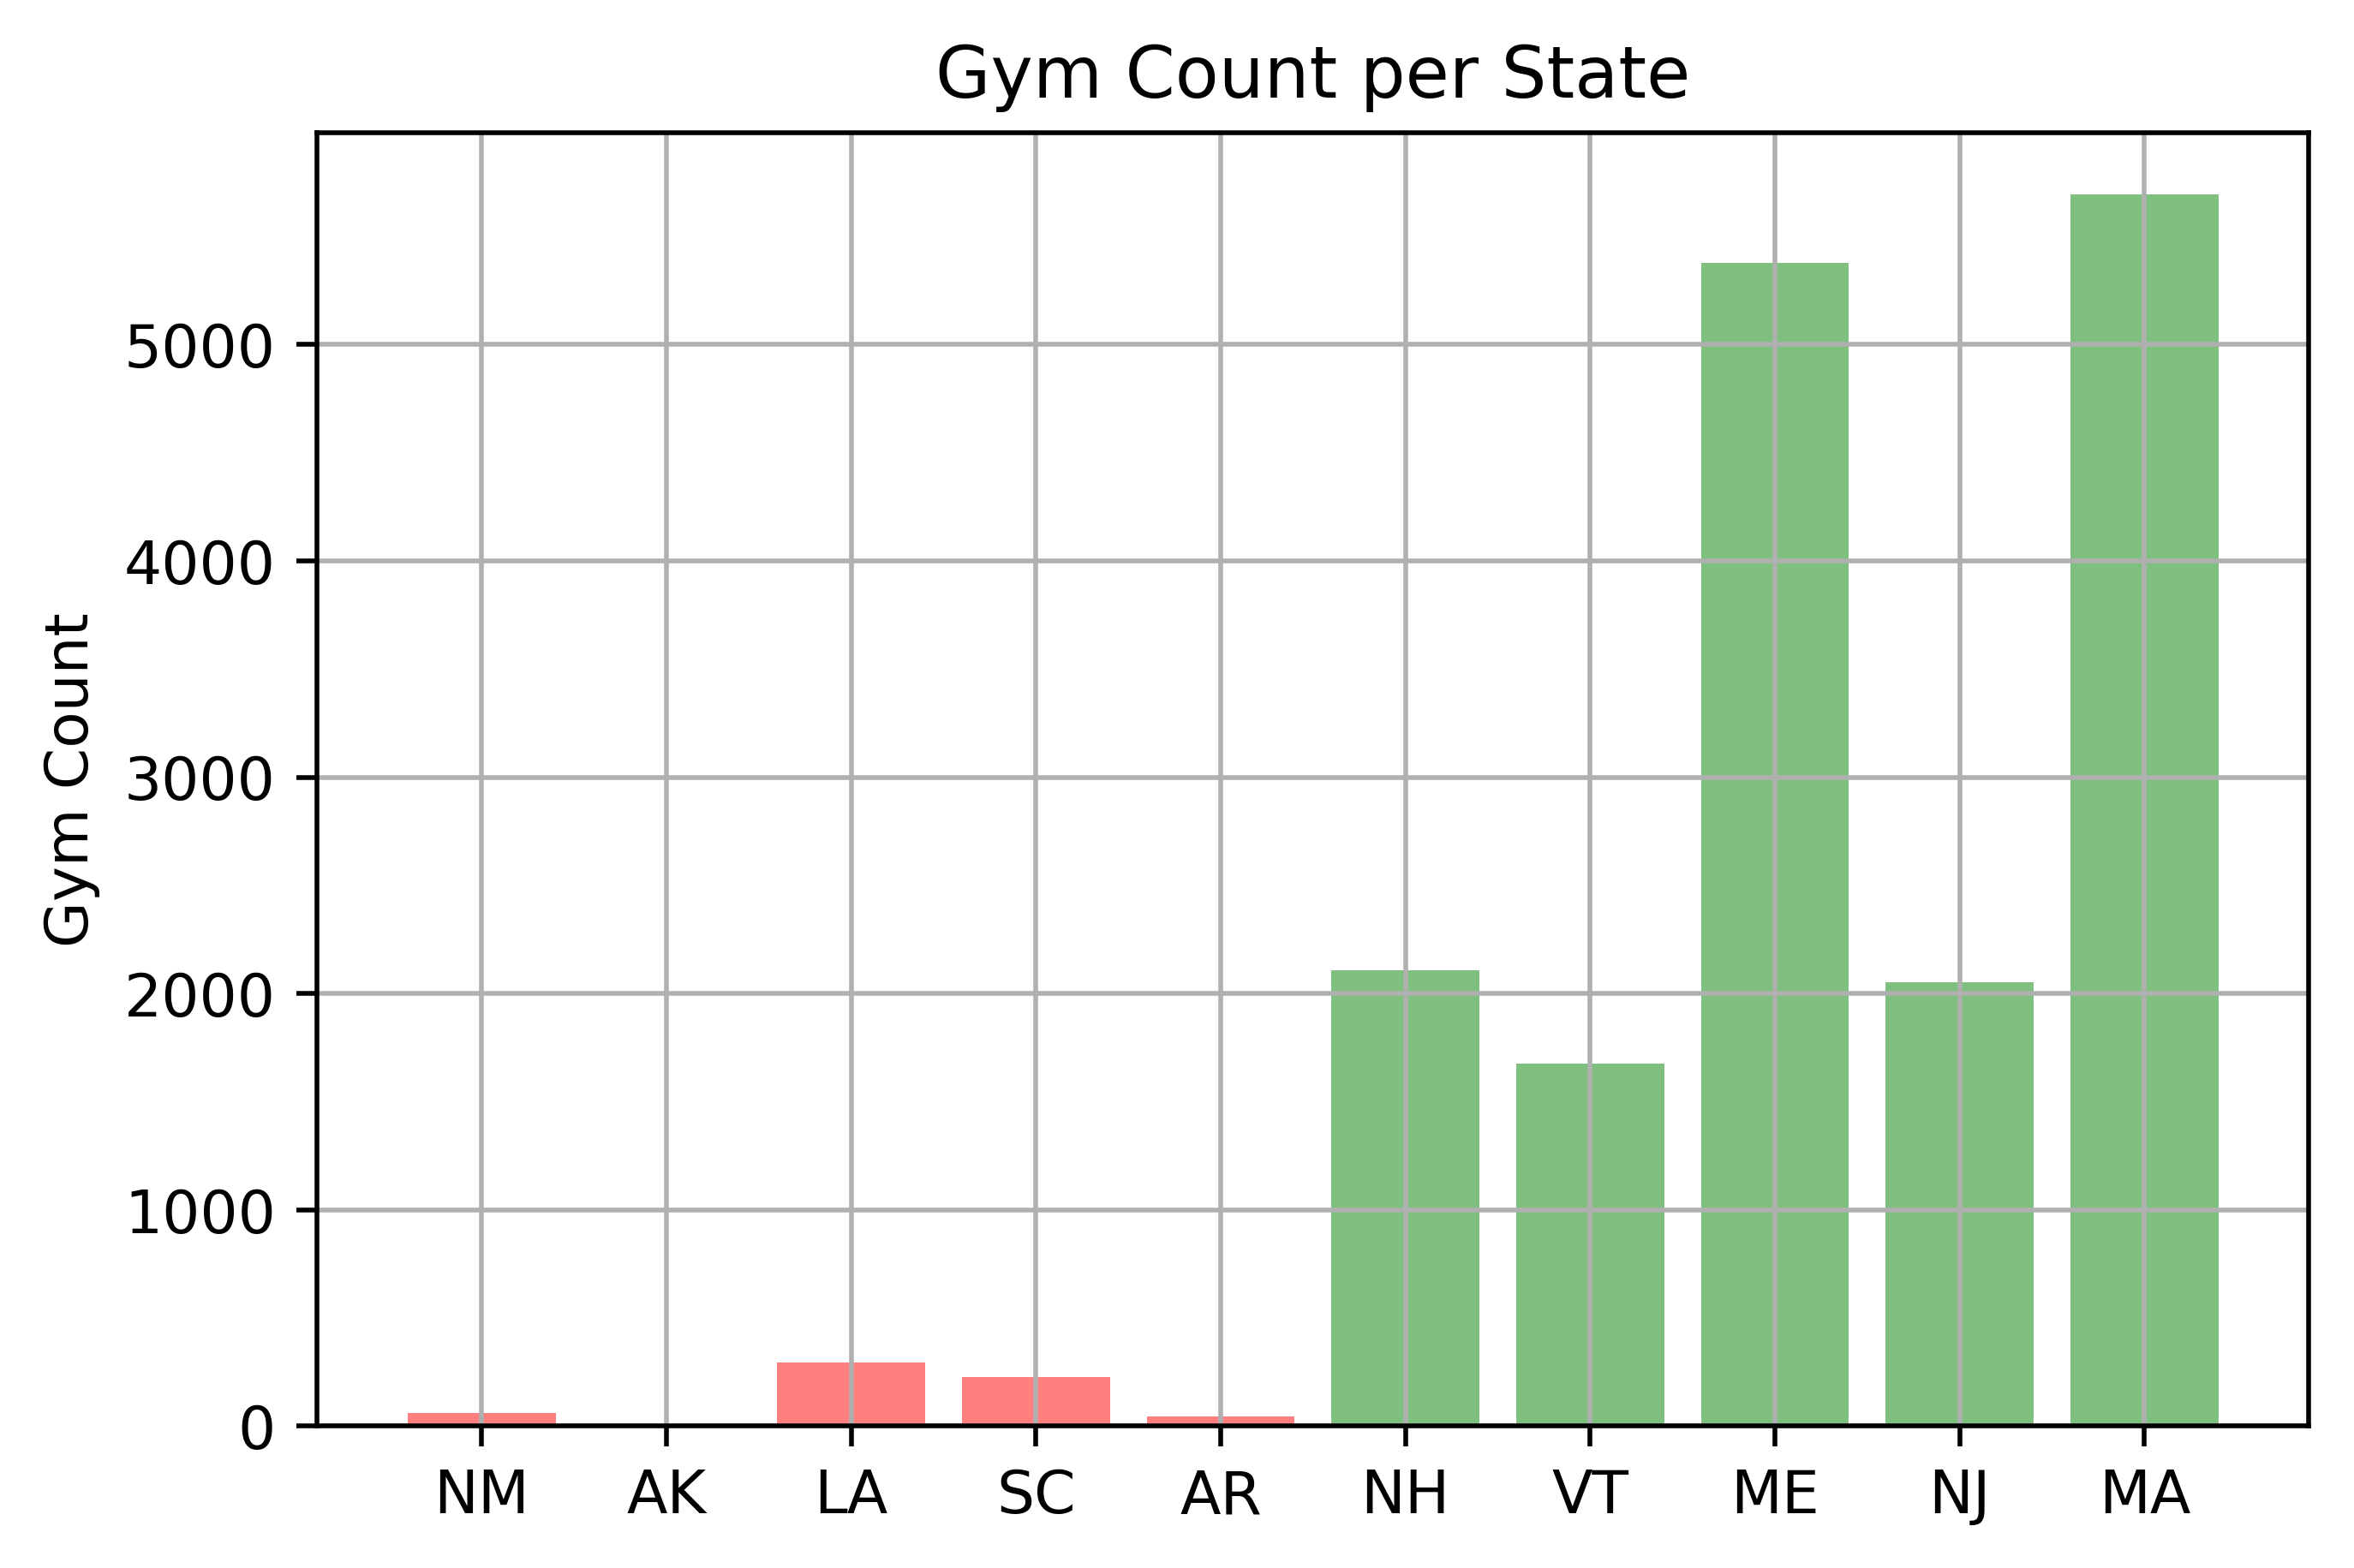

In [5]:
colors = ["r","r","r","r","r","g","g","g","g","g"]

plt.figure(dpi=500)
plt.bar(state_list, gym_count, color=colors, alpha=0.5, align="center")
plt.grid()
plt.title("Gym Count per State")
plt.ylabel("Gym Count")
plt.savefig("Gym Count in Top 5 and Bottom 5 State Crime Rate.png", bbox_inches = 'tight')
plt.show()

# Gym Data By County 

In [22]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import gmaps
import matplotlib.pyplot as plt


# Google API Key
from config import gkey
from config2 import ykey

In [23]:
zipcode_data = pd.read_csv ("./uszips.csv")
zipcode_data.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,951,18.4284,-66.2566,Toa Baja,PR,Puerto Rico,True,NaN,35,32.5,72137,Toa Baja,{'72137':100},False,False,America/Puerto_Rico
1,96863,21.4484,-157.7623,Mcbh Kaneohe Bay,HI,Hawaii,True,NaN,52,708.1,15003,Honolulu,{'15003':100},False,False,Pacific/Honolulu
2,34141,25.9723,-81.0936,Ochopee,FL,Florida,True,NaN,232,0.1,12021,Collier,"{'12021':97.41,'12087':2.59}",False,False,America/New_York
3,78060,28.4469,-98.1071,Oakville,TX,Texas,True,NaN,37,36.3,48297,Live Oak,{'48297':100},False,False,America/Chicago
4,78144,28.9551,-97.8880,Panna Maria,TX,Texas,True,NaN,45,7.7,48255,Karnes,{'48255':100},False,False,America/Chicago


In [24]:
zipcode_gym_data = pd.read_csv ("./zipcode gym count.csv")
zipcode_gym_data.head()

,Unnamed: 0,state_id,zip,lat,lng,gym count
0,7,LA,70801,30.4497,-91.1859,22.0
1,15,NM,88004,32.2231,-106.9874,0.0
2,17,NM,88055,32.7382,-108.7339,0.0
3,20,NM,88262,33.1329,-103.4259,0.0
4,22,SC,29899,33.9279,-82.2507,0.0


In [25]:
county_gym_data = pd.merge (zipcode_gym_data, zipcode_data, on="zip", how="left")
county_gym_data.head()

,Unnamed: 0,state_id_x,zip,lat_x,lng_x,gym count,lat_y,lng_y,city,state_id_y,...,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,7,LA,70801,30.4497,-91.1859,22.0,30.4497,-91.1859,Baton Rouge,LA,...,True,NaN,13,38.7,22033,East Baton Rouge,{'22033':100},False,False,America/Chicago
1,15,NM,88004,32.2231,-106.9874,0.0,32.2231,-106.9874,Las Cruces,NM,...,True,NaN,699,6.9,35013,Doña Ana,{'35013':100},False,False,America/Denver
2,17,NM,88055,32.7382,-108.7339,0.0,32.7382,-108.7339,Redrock,NM,...,True,NaN,37,0.0,35017,Grant,{'35017':100},False,False,America/Denver
3,20,NM,88262,33.1329,-103.4259,0.0,33.1329,-103.4259,Mcdonald,NM,...,True,NaN,30,0.2,35025,Lea,{'35025':100},False,False,America/Denver
4,22,SC,29899,33.9279,-82.2507,0.0,33.9279,-82.2507,Mc Cormick,SC,...,True,NaN,1244,1272.9,45065,McCormick,{'45065':100},False,False,America/New_York


In [74]:
county_gym_data = county_gym_data[["state_id_x", "zip", "gym count", "county_name"]]
county_gym_data.head()


,state_id_x,zip,gym count,county_name
0,LA,70801,22.0,East Baton Rouge
1,NM,88004,0.0,Doña Ana
2,NM,88055,0.0,Grant
3,NM,88262,0.0,Lea
4,SC,29899,0.0,McCormick


In [94]:
county_gym_data_2 = county_gym_data.groupby(["state_id_x","county_name"])

county_gym_data_3 = county_gym_data_2["gym count"].sum()
county_gym_data_3


state_id_x  county_name          
AK          Aleutians East              0.0
            Aleutians West              0.0
            Anchorage                  98.0
            Bethel                      0.0
            Bristol Bay                 0.0
            Denali                      0.0
            Dillingham                  0.0
            Fairbanks North Star        6.0
            Haines                      0.0
            Hoonah-Angoon               0.0
            Juneau                      4.0
            Kenai Peninsula             0.0
            Ketchikan Gateway           0.0
            Kodiak Island               0.0
            Lake and Peninsula          0.0
            Matanuska-Susitna           0.0
            Nome                        0.0
            North Slope                 0.0
            Northwest Arctic            0.0
            Petersburg                  0.0
            Prince of Wales-Hyder       0.0
            Sitka                       0.

In [97]:
county_gym_data_3.to_csv("county gym count.csv")

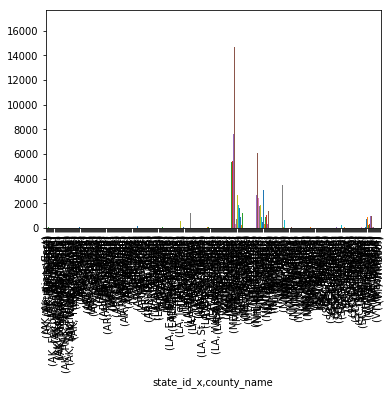

In [95]:
gym_count_chart = county_gym_data_3.plot(kind='bar')

# Collecting Crime Data

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from bs4 import BeautifulSoup
import re

# Import API key
from config import ckey, gkey

state_abbr = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN",
              "IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV",
              "NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN",
              "TX","UT","VT","VA","WA","WV","WI","WY"]

states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

states_dict = dict(zip(states, state_abbr))


# Crime statistics by state

## Request crime statistics by state

- Source: FBI Crime Data API, official estimates fron the Universal Crime Reports (UCR), compiled and published by FBI
- Time range: 2014 - 2017

In [2]:
list_of_frames = []
for state in state_abbr:
    query_url = f'https://api.usa.gov/crime/fbi/sapi/api/estimates/states/{state}/2010/2017?api_key={ckey}'
    response = requests.get(query_url)
    data = response.json()
    df = pd.DataFrame(data['results'])
    list_of_frames.append(df)
    
dict_of_frames

NameError: name 'dict_of_frames' is not defined

## Aggregate dataframes
- Append dataframes for each year into a single dataframe
- Filter by columns
- Export the aggregated dataframe to a csv file

In [ ]:
df = list_of_frames[0].append(list_of_frames[1:], ignore_index = True)
df.set_index(['state_abbr', 'year'])

cols = ['year',
        'state_abbr',
        'state_id',
        'population',
        'aggravated_assault',
        'arson',
        'burglary',
        'homicide',
        'larceny',
        'motor_vehicle_theft',
        'property_crime',
        'rape_legacy',
        'rape_revised',
        'robbery',
        'violent_crime']

df = df[cols]
df.head()

export_csv = df.to_csv (r'data/crime_by_state.csv', index = None, header=True)

# Gun Violence
Source: https://gunviolencearchive.org  
Time range: 2014-2019
- Download data in .csv format from the website
- Read the files into dataframes (each year's incidence will be in one dataframe)
- Request lat, lon for each incident location from Google Geocode API
- Save the year-by-year data in separate dataframes
- Aggregate these separate dataframes into a single dataframe, containing all recorded incidents since 2014
- Save as a csv file

In [ ]:
files = [r'data/2015 mass shootings.csv',
        r'data/2016 mass shootings.csv',
        r'data/2017 mass shootings.csv', 
        r'data/2018 mass shootings.csv',
        r'data/2019 mass shootings.csv']

for file in files:
    fname = file.split('/')[1]
    year = fname.split(' ')[0]
    print(year)
    shootings = pd.read_csv(file)
    shootings['state_abbr'] = shootings['State'].map(states_dict)
    
    shootings['lat'] = ''
    shootings['lon'] = ''
    
    for row in range(len(shootings)):

        try:
            address = f'{shootings.iloc[row, 3]}, {shootings.iloc[row, 2]}, {shootings.iloc[row, 1]}'
            address_url = f'https://maps.googleapis.com/maps/api/geocode/json?address=[{address}]&sensor=true&key={gkey}'
            response = requests.get(address_url)
            result = response.json()
            print(f'Year {year} incident: Location {row} out of {len(shootings)} | {address}')
            shootings.loc[row, 'lat'] = result['results'][0]['geometry']['location']['lat']
            shootings.loc[row, 'lon'] = result['results'][0]['geometry']['location']['lng']
        except:
            print(f'Something went wrong, skipping...')
            
    print('=========================================')
    print('Saving into .csv file')
    export_csv = shootings.to_csv (f'data/{year}_shootings.csv', index = None, header=True)
    print('Saved')

# Crime reports by agency

## Build a dataframe of all law enforcement agencies in the US

Source: www.icpsr.umich.edu

- Scrape law enforcement agency titles and ORIs from the website using Beautifull Soup
- Create a dataframe that contains the following information for wach agency: Name, State, County, ORI

In [49]:
# Build a list of urls of pages on www.icpsr.umich.edu for every county of every state
pages = []
for i in range(1,57):
    oris_url = f'https://www.icpsr.umich.edu/files/NACJD/ORIs/{str(i).zfill(2)}oris.html'
    pages.append(oris_url)
    
pages

['https://www.icpsr.umich.edu/files/NACJD/ORIs/01oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/02oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/03oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/04oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/05oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/06oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/07oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/08oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/09oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/10oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/11oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/12oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/13oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/14oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/15oris.html',
 'https://www.icpsr.umich.edu/files/NACJD/ORIs/16oris.html',
 'https://www.icpsr.umic

In [40]:
page = requests.get('https://www.icpsr.umich.edu/files/NACJD/ORIs/02oris.html')
soup = BeautifulSoup(page.text, 'html.parser')
county_raw = soup.find_all('h3')
agency_raw = soup.find_all('pre')
s = county_raw[0].get_text().split(',')
s[0].split('(')[0]
# s[0][(s[0].find("(")+1):s[0].find(")")].split(' ')[0].split('=')[1]

'ALEUTIANS EAST '

In [54]:
dfObj = []
agencies_df = []
# count = 0


#Find all counties for one state
def county_agencies(url, count = 0):
    '''
    This function searches for 'h3' tag (county name) and 'pre' tag (agency name and ORI9)
    and builds a dataframe of all law inforcement agencien in the county whos url is provided as an input
    
    '''
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    county_raw = soup.find_all('h3')
    agency_raw = soup.find_all('pre')

    # Create an empty Dataframe with pre-defined column names
    county_df = pd.DataFrame(columns=['State', 'County', 'County FIPS', 'Agency Name', 'Agency ORI9'])
    for i, item in enumerate(agency_raw):
        raw_list = item.get_text(strip = True).split('\n')
        agency_list = [s for s in raw_list[1:] if s !='']
        for agency, county in zip(agency_list, county_raw):
            print(count)
            data = [s for s in agency.split(' ') if s!= '']
            aname = ' '.join(data[:-2])
            county_df.loc[count, ['Agency Name']] = aname
            county_df.loc[count, ['Agency ORI9']] = data[-1]
            county_df.loc[count, ['State']] = county.get_text().split(',')[1].strip(':')
            county_df.loc[count, ['County']] = county.get_text().split(',')[0].split('(')[0]
            county_df.loc[count, ['County FIPS']] = county.get_text().split(',')[0].split('(')[1].split(' ')[0].split('=')[1]
#                 print(county.get_text().split(',')[0].split('(')[0])
#                 print(county_df.loc[count, ['Agency Name']])
#                 print(county_df.loc[count, ['Agency ORI9']])
#                 print(county_df.loc[count, ['State']])
#                 print(county_df.loc[count, ['County']])
#                 print(county_df.loc[count, ['County FIPS']])
            count+=1

            
    return county_df

# county_agencies('https://www.icpsr.umich.edu/files/NACJD/ORIs/02oris.html')
# Build list of dataframes for each county
# pages = ['https://www.icpsr.umich.edu/files/NACJD/ORIs/02oris.html', 'https://www.icpsr.umich.edu/files/NACJD/ORIs/01oris.html']
dfObj = [county_agencies(url) for url in pages]

# Append all dataframes to get a single one
agencies_df = dfObj[0].append(dfObj[1:], ignore_index = True)
agencies_df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265

155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136

282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
11

IndexError: list index out of range

In [53]:
agencies_df.head()

,State,County,County FIPS,Agency Name,Agency ORI9
0,AL,AUTAUGA,001,AUTAUGA COUNTY SHERIFF'S OFFICE,AL0040000
1,AL,BALDWIN,003,AUTAUGAVILLE POLICE DEPARTMENT,AL0040200
2,AL,BARBOUR,005,PRATTVILLE POLICE DEPARTMENT,AL0040100
3,AL,AUTAUGA,001,BALDWIN COUNTY SHERIFF'S OFFICE,AL0050000
4,AL,BALDWIN,003,BAY MINETTE POLICE DEPARTMENT,AL0050100


In [12]:
export_csv = agencies_df.to_csv (r'data/agencies.csv', index = None, header=True)

# Aggregate Crime Data

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

## Aggregate all mass shooting incidents (years 2014-2019)

In [9]:
df_list = []

for i in range(2015,2020):
    path = f"data/{i}_shootings.csv"
    df = pd.read_csv(path)
    df_list.append(df)
    
df = df_2014.append(df_list, ignore_index = True)
df.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,state_abbr,lat,lon
0,"December 29, 2014",Louisiana,New Orleans,Poydras and Bolivar,0,4,NaN,LA,29.954028,-90.084158
1,"December 27, 2014",California,Los Angeles,8800 block of South Figueroa Street,1,3,NaN,CA,33.957372,-118.282712
2,"December 27, 2014",California,Sacramento,4000 block of May Street,0,4,NaN,CA,38.640429,-121.443274
3,"December 26, 2014",Illinois,East St. Louis,2500 block of Summit Avenue,1,3,NaN,IL,38.619618,-90.125416
4,"December 24, 2014",Missouri,Saint Louis,18th and Pine,1,3,NaN,MO,38.630465,-90.206117


## Add "year" column to the dataframe

In [10]:
df['Year'] = df['Incident Date'].apply(lambda x: x.split(',')[1])
df.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,state_abbr,lat,lon,Year
0,"December 29, 2014",Louisiana,New Orleans,Poydras and Bolivar,0,4,NaN,LA,29.954028,-90.084158,2014
1,"December 27, 2014",California,Los Angeles,8800 block of South Figueroa Street,1,3,NaN,CA,33.957372,-118.282712,2014
2,"December 27, 2014",California,Sacramento,4000 block of May Street,0,4,NaN,CA,38.640429,-121.443274,2014
3,"December 26, 2014",Illinois,East St. Louis,2500 block of Summit Avenue,1,3,NaN,IL,38.619618,-90.125416,2014
4,"December 24, 2014",Missouri,Saint Louis,18th and Pine,1,3,NaN,MO,38.630465,-90.206117,2014


## Export aggregated mass shootings data to .csv file

In [39]:
# export_csv = df.to_csv (r'data/shootings_all_years.csv', index = None, header=True)

# Crime Data Analysis

In [364]:
# Dependancies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import requests
import time
from pprint import pprint
import gmaps
import gmaps.geojson_geometries
import scipy.stats as stat
import seaborn as sns
import statsmodels.api as sm

from config import gkey, ckey

state_abbr = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN",
              "IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV",
              "NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN",
              "TX","UT","VT","VA","WA","WV","WI","WY"]

states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

## Load crime statistics by state and filter for 2017

In [365]:
# Load crime statistics by state for all years
crime_df = pd.read_csv('data/crime_by_state.csv')

# Filter out all years except for 2017 (the latest). 
crime2017_df = crime_df[crime_df['year'] == 2017]
crime2017_df.head()

,year,state_abbr,state_id,population,aggravated_assault,arson,burglary,homicide,larceny,motor_vehicle_theft,property_crime,rape_legacy,rape_revised,robbery,violent_crime
17,2017,AL,2,4874747,18902,703.0,31477,404,99842,12841,144160,0,2028.0,4217,25551
56,2017,AK,1,739795,4257,139.0,4171,62,17775,4258,26204,0,863.0,951,6133
103,2017,AZ,5,7016270,24207,1183.0,37627,416,147830,19058,204515,0,3581.0,7440,35644
119,2017,AR,3,3004279,12425,534.0,21862,258,63374,7253,92489,0,2053.0,1935,16671
161,2017,CA,6,39536653,104454,8648.0,176690,1830,642033,168391,987114,0,14721.0,56622,177627


## Crime statistics per 100 people

- Remove all columns except 'violent crime' and 'property crime'
- Normalize by state population
- Sort dataframe to see top five and bottom five states
- Create a list of five worst and five best states for agency data requests

In [366]:
crime2017_df = crime2017_df[['state_abbr', 'violent_crime', 'property_crime', 'population']]
crime2017_df['violent_crime_per100'] = crime2017_df['violent_crime']*100/crime2017_df['population']
crime2017_df['property_crime_per100'] = crime2017_df['property_crime']*100/crime2017_df['population']
crime2017_df['total_crime_per100'] = crime2017_df['violent_crime_per100']+crime2017_df['property_crime_per100']
crime2017_df.head()

,state_abbr,violent_crime,property_crime,population,violent_crime_per100,property_crime_per100,total_crime_per100
17,AL,25551,144160,4874747,0.524150,2.957282,3.481432
56,AK,6133,26204,739795,0.829013,3.542062,4.371076
103,AZ,35644,204515,7016270,0.508019,2.914868,3.422887
119,AR,16671,92489,3004279,0.554909,3.078576,3.633484
161,CA,177627,987114,39536653,0.449272,2.496706,2.945978


## Five states with highest crime rates

In [367]:
top_five= crime2017_df.sort_values(by = ['total_crime_per100'], ascending = False)[:5]
top_five

,state_abbr,violent_crime,property_crime,population,violent_crime_per100,property_crime_per100,total_crime_per100
1171,NM,16359,82306,2088070,0.783451,3.941726,4.725177
56,AK,6133,26204,739795,0.829013,3.542062,4.371076
682,LA,26092,157712,4684333,0.557006,3.366797,3.923803
1522,SC,25432,160575,5024369,0.506173,3.195924,3.702097
119,AR,16671,92489,3004279,0.554909,3.078576,3.633484


## Five states with lowest crime rates

In [368]:
bottom_five = crime2017_df.sort_values(by = ['total_crime_per100'], ascending = True)[:5]
bottom_five

,state_abbr,violent_crime,property_crime,population,violent_crime_per100,property_crime_per100,total_crime_per100
1093,NH,2668,18555,1342795,0.198690,1.381819,1.580509
1734,VT,1034,8960,623657,0.165796,1.436687,1.602483
721,ME,1617,20133,1335907,0.121041,1.507066,1.628107
1132,NJ,20604,140086,9005644,0.228790,1.555536,1.784325
781,MA,24560,98575,6859819,0.358027,1.436991,1.795018


### List of 5 states with highest crime rates and 5 states with lowest crime rates

In [369]:
wb_df = top_five.append(bottom_five).reset_index(drop = True)
wb_df.head(10)

,state_abbr,violent_crime,property_crime,population,violent_crime_per100,property_crime_per100,total_crime_per100
0,NM,16359,82306,2088070,0.783451,3.941726,4.725177
1,AK,6133,26204,739795,0.829013,3.542062,4.371076
2,LA,26092,157712,4684333,0.557006,3.366797,3.923803
3,SC,25432,160575,5024369,0.506173,3.195924,3.702097
4,AR,16671,92489,3004279,0.554909,3.078576,3.633484
5,NH,2668,18555,1342795,0.198690,1.381819,1.580509
6,VT,1034,8960,623657,0.165796,1.436687,1.602483
7,ME,1617,20133,1335907,0.121041,1.507066,1.628107
8,NJ,20604,140086,9005644,0.228790,1.555536,1.784325
9,MA,24560,98575,6859819,0.358027,1.436991,1.795018


## Stacked bar chart of crime rates for five worst/five best states

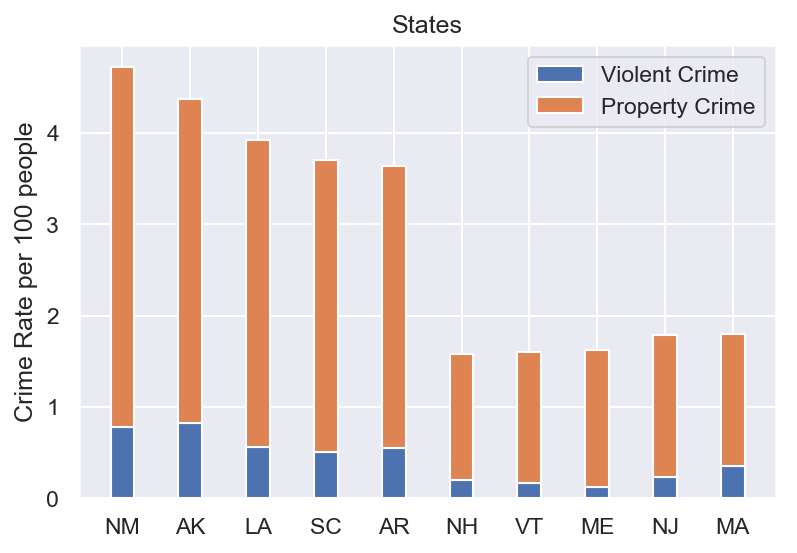

In [370]:
state_labels = list(wb_df['state_abbr'])
rng = np.arange(len(wb_df))

plt.figure(dpi = 150)
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(wb_df.index, wb_df['violent_crime_per100'],width, label = 'Violent Crime')
p2 = plt.bar(wb_df.index, wb_df['property_crime_per100'], width, bottom = wb_df['violent_crime_per100'], label = 'Property Crime')
plt.ylabel('Crime Rate per 100 people')
plt.title('States')
plt.xticks(rng, state_labels)
plt.legend()
plt.show()

## List of 5 states with highest crime rates and lowest crme rates

In [371]:
worst = list(top_five['state_abbr'])
best = list(bottom_five['state_abbr'])
worst_best = worst+best
worst_best

['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA']

In [372]:
states_full = ['New Mexico', 'Alaska', 'Louisiana', 'South Carolina', 'Arkansas', 
          'New Hampshire', 'Vermont', 'Maine', 'New Jersey', 'Massachusetts']

## Prepare state data for mapping

- Create a normalized colormap
- Update the state dataframe to add two missing territories (DC and Puerto Rico) 
- Turn the colormap into an list of hex colors, based on the level of crime
- Load states geometry from gmaps
- Plot

In [373]:
max_crime = max(crime2017_df['total_crime_per100'])
crime_val = crime2017_df['total_crime_per100']/max(crime2017_df['total_crime_per100'])
crime_val = crime_val.tolist()

In [374]:
norm = colors.Normalize(vmin=min(crime_val), vmax = max(crime_val))

m = cm.ScalarMappable(norm = norm, cmap='OrRd')
colormap = m.to_rgba(crime_val)
clr = [colors.to_hex(c) for c in colormap]

colorcoded_states = pd.Series(clr, index = crime2017_df['state_abbr'])
colorcoded_states = colorcoded_states.to_frame()

# Create a dictionary of state's abbreviated names as keys and full names as values
state_dict = dict(zip(state_abbr, states))

state_names = pd.Series(states, index = state_abbr)
state_names = state_names.to_frame()

state_color = colorcoded_states.merge(state_names, right_index = True, left_index = True)
state_color = state_color.rename(index=str, columns={"0_x": "color", "0_y": "state"})

## Map crime rates by state using gmaps

In [375]:
states_geo = gmaps.geojson_geometries.load_geometry('us-states')

# get list of states as they are ordered in gmaps
st = [i['properties']['NAME'] for i in states_geo['features']]

# find territories, missing in the original dataframe and present in the 'us-states' geojson file
missing = [s for s in st if s not in states]

# Add the territories to the frame and color them white 
missing_df = pd.DataFrame([['#ffffff', missing[0]], ['#ffffff', missing[1]]], columns=list(state_color), index = ['DC', 'PR'])
state_color = state_color.append(missing_df)
state_order = pd.DataFrame(pd.Series(st), columns = ['state'])

# create a state-color dataframe for geojson layer
df = state_order.merge(state_color, on = 'state')



# Create a layer for color coded states
gmaps.configure(api_key = gkey)
fig = gmaps.figure()
states_layer = gmaps.geojson_layer(states_geo, 
                                   fill_color = list(df['color']))
fig.add_layer(states_layer)
fig

Figure(layout=FigureLayout(height='420px'))

## Map all mass shooting incidents reported between 2014 and 2019

In [376]:
shootings = pd.read_csv('data/shootings_all_years.csv')
shootings['Total Victims Count'] = shootings['# Killed'] + shootings['# Injured']
most_victims = shootings.sort_values(by = ['Total Victims Count'], ascending = False)
most_victims.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,state_abbr,lat,lon,Year,Total Victims Count
1056,"October 1, 2017",Nevada,Las Vegas,3950 Las Vegas Blvd S,59,441,NaN,NV,36.093392,-115.176337,2017,500
849,"June 12, 2016",Florida,Orlando,1912 S Orange Avenue,50,53,NaN,FL,28.519612,-81.376846,2016,103
1022,"November 5, 2017",Texas,Sutherland Springs,216 4th St,27,20,NaN,TX,29.273218,-98.056343,2017,47
286,"December 2, 2015",California,San Bernardino,1365 South Waterman Avenue,16,19,NaN,CA,34.075564,-117.277623,2015,35
1642,"February 14, 2018",Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17,NaN,FL,26.304503,-80.269457,2018,34


In [377]:
locations = [tuple(coord) for coord in shootings[['lat', 'lon']].values]
victims = list(shootings['Total Victims Count'])

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights= victims, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

## Obtain all agency reports for the top five and bottom five states

Source: FBI Crime Data API, official estimates fron the Universal Crime Reports (UCR), compiled and published by FBI  
Time range: 2014 - 2017

- Read a list of agencies from .csv file
- Filter the list to exclude the states which are not in the top of bottom five
- Request all reports from agencies in  ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA'] states
- Save all reports as a .csv file fr future use
- Read into a dataframe and clean it (group by year and county, sum up all violent crime and property crime)
- Save as a new csv file

In [378]:
# Read a list of a
agencies = pd.read_csv('data/agencies.csv')
agencies_df = agencies[agencies['State'].isin(worst_best)].reset_index()

# export_csv = reports_df.to_csv (r'data/reports_by_agency_10states.csv', index = None, header=True)

## Request crime reports from law enforcemen agencies in 5 worst and 5 best states:
### NM, AK, LA, SC, AR, NH, VT, ME, NJ, MA

In [379]:

def reports_by_agency(agencies_df):
    # Collects all Uniform Crime Reports law enforcement agencies in dataframe agences_df
    # Request rate is limited to 1000 requests per hour
    reports_by_agency = []

    num = len(agencies_df)
    count = 0
    for i in range(2926, num):

        ori = agencies_df['Agency ORI9'][i]

        try:
            query_url = f'https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{ori}/offenses/2014/2017?api_key={ckey}'
            response = requests.get(query_url)
            print('==========================================')
            print(f'Requesting report from agency {ori}')
            count +=1
            result = response.json()
            report_dict = result['results']
            print(f'Adding {i} report of {num} | agency ORI9 is {ori} | Request count {count}')
            reports_by_agency.append(pd.DataFrame(report_dict))
        except:
            print('............................................')
            print(f'Something went wrong, skipping agency {ori}...')
    return reports_by_agency
           
# reports_by_agency = reports_by_agency(agencies_df)

# reports_df = reports_by_agency[0].append(reports_by_agency[1:], ignore_index = True)
# export_csv = reports_df.to_csv (r'data/reports_by_agency_10states_3.csv', index = None, header=True)

# files = ['data/reports_by_agency_10states.csv',
#         'data/reports_by_agency_10states_1.csv',
#         'data/reports_by_agency_10states_2.csv',
#         'data/reports_by_agency_10states_3.csv']

# dfObj = []

# for file in files:
#     df = pd.read_csv(file)
#     dfObj.append(df)
    
# allreports = dfObj[0].append(dfObj[1:], ignore_index = True)
# allreports = allreports.rename(index = str, columns = {'ori': 'Agency ORI9'})
# allreports = allreports.merge(agencies_df, how = 'left')
# # export_csv = allreports.to_csv (r'data/all_agency_reports_10states.csv', index = None, header=True)

In [380]:
allreports = pd.read_csv('data/crime_by_county2017_10states.csv')
allreports.head()

,State,County,data_year,property-crime,violent-crime,population,state_abbr
0,Alaska,aleutians,2017,5432,1212,739795,AK
1,Alaska,anchorage,2017,762,64,739795,AK
2,Alaska,bethel,2017,127,15,739795,AK
3,Alaska,bristol,2017,16380,3601,739795,AK
4,Alaska,dillingham,2017,76,2,739795,AK


## Aggregate all state and county level data

### By state
- add population by state
- add household income by state
- gyms by state (10 states only)

### By county

- add population by county
- add household income
- gyms by state (10 states only)

### Load crime statistics for 2017 for the 10 states ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA']

In [383]:
crime_county_2017 = pd.read_csv('data/crime_by_county2017_10states.csv')
crime_county_2017 .head()

,State,County,data_year,property-crime,violent-crime,population,state_abbr
0,Alaska,aleutians,2017,5432,1212,739795,AK
1,Alaska,anchorage,2017,762,64,739795,AK
2,Alaska,bethel,2017,127,15,739795,AK
3,Alaska,bristol,2017,16380,3601,739795,AK
4,Alaska,dillingham,2017,76,2,739795,AK


In [209]:
# export_csv = aggregated_2017.to_csv(r'data/crime_by_county2017_10states.csv', index = None, header=True)

### Load crime data for 2017 per county ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA']

In [210]:
df_crime = pd.read_csv('data/crime_by_county2017_10states.csv')
df_crime.head()

,State,County,data_year,property-crime,violent-crime,population,state_abbr
0,Alaska,aleutians,2017,5432,1212,739795,AK
1,Alaska,anchorage,2017,762,64,739795,AK
2,Alaska,bethel,2017,127,15,739795,AK
3,Alaska,bristol,2017,16380,3601,739795,AK
4,Alaska,dillingham,2017,76,2,739795,AK


### Load hospital count per county ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA']

In [384]:
df_hospitals = pd.read_csv('data/hospital_county.csv')
df_hospitals['index'] = df_hospitals['index'].apply(lambda x: x.lower())
df_hospitals = df_hospitals.rename(index = str, columns = {'index': 'County', 'COUNTY': 'Hospital count'})
df_hospitals['County'] = df_hospitals['County'].apply(lambda x: x.split()[0])
df_hospitals.head()

,County,Hospital count
0,los,131
1,harris,108
2,jefferson,94
3,montgomery,78
4,cook,75


### Load gym counts per county ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA']

In [212]:
df_gym = pd.read_csv('data/county gym count.csv', header = None)
df_gym [1] = df_gym [1].apply(lambda x: x.lower())
df_gym = df_gym.rename(columns = {0: 'State', 1: 'County', 2:'Gym count'})
df_gym['County'] = df_gym['County'].apply(lambda x: x.split(' ')[0])
df_gym.head()

,State,County,Gym count
0,AK,aleutians,0.0
1,AK,aleutians,0.0
2,AK,anchorage,98.0
3,AK,bethel,0.0
4,AK,bristol,0.0


In [213]:
df_agencies = pd.read_csv('data/agencies.csv')
df_agencies['County'] = df_agencies['County'].apply(lambda x: x.strip().lower())
df_agencies['State'] = df_agencies['State'].apply(lambda x: x.strip())
df_agencies.head()

,State,County,County FIPS,Agency Name,Agency ORI9
0,AL,autauga,1.0,AUTAUGA COUNTY SHERIFF'S OFFICE,AL0040000
1,AL,baldwin,3.0,AUTAUGAVILLE POLICE DEPARTMENT,AL0040200
2,AL,barbour,5.0,PRATTVILLE POLICE DEPARTMENT,AL0040100
3,AL,autauga,1.0,BALDWIN COUNTY SHERIFF'S OFFICE,AL0050000
4,AL,baldwin,3.0,BAY MINETTE POLICE DEPARTMENT,AL0050100


### Load unemployment rates per county ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA']

In [385]:
states = ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA']

df_unemployment = pd.read_csv('data/county_state_by_unemployment_rate.csv')
df_unemployment['County'] = df_unemployment['County'].apply(lambda x: x.split(' ')[0].lower().strip())
df_unemployment['State'] = df_unemployment['State'].apply(lambda x: str(x).strip())
df_unemployment = df_unemployment[df_unemployment['State'].isin(states)]
df_unemployment.head()

,FIPS,County,State,Unemployment Rate
67,13,aleutians,AK,2.5
68,16,aleutians,AK,3.6
69,20,anchorage,AK,6.0
70,50,bethel,AK,13.8
71,60,bristol,AK,6.3


### Load median household income data

In [387]:
df_income = pd.read_csv('data/list_of_state_and_counties_by_median_income.csv')
df_income['County'] = df_income['County'].apply(lambda x: x.split(' ')[0])
df_income = df_income[df_income['State'].isin(states_full)]
df_income.head()

,State,County,MedianIncome
67,Alaska,north,82500
68,Alaska,dillingham,56089
69,Alaska,kenai,75689
70,Alaska,yukon-koyukuk,46875
71,Alaska,aleutians,87159


### Import county population estimates for 2017

In [388]:
countypop_df = pd.read_csv('data/co-est2017-alldata.csv', encoding = "ISO-8859-1")
countypop_df = countypop_df.filter(['STNAME', 'CTYNAME', 'CENSUS', 'POPESTIMATE2017'], axis = 1)
countypop_10states = countypop_df[countypop_df['STNAME'].isin(states_full)].rename(index = str, 
                                                                                   columns = {'STNAME': 'State', 
                                                                                              'CTYNAME':'County',
                                                                                             'POPESTIMATE2017': 'County Population'})
countypop_10states['County'] = countypop_10states['County'].apply(lambda x: x.split(' ')[0].lower())
countypop_10states.head()
# export_csv = countypop_10states.to_csv(r'data/countypop_10states.csv', index = None, header=True)

,State,County,County Population
68,Alaska,alaska,739795
69,Alaska,aleutians,3370
70,Alaska,aleutians,5763
71,Alaska,anchorage,294356
72,Alaska,bethel,18076


### Merge unemployment, population 

In [396]:
merged_df = df_crime.merge(df_unemployment, how = 'left', left_on=['County','state_abbr'], right_on = ['County', 'State'])
merged_df = merged_df.rename(index = str, columns = {'State_x': 'State'}).drop(columns = ['FIPS', 'State_y'])
merged_df.head()

,State,County,data_year,property-crime,violent-crime,population,state_abbr,Unemployment Rate
0,Alaska,aleutians,2017,5432,1212,739795,AK,2.5
1,Alaska,aleutians,2017,5432,1212,739795,AK,3.6
2,Alaska,anchorage,2017,762,64,739795,AK,6.0
3,Alaska,bethel,2017,127,15,739795,AK,13.8
4,Alaska,bristol,2017,16380,3601,739795,AK,6.3


### Merge dataframe with the gym data on County and State 

In [397]:
merged_df = merged_df.merge(df_gym, left_on = ['County', 'state_abbr'], right_on = ['County', 'State'], how = 'left')
merged_df = merged_df.drop_duplicates().reset_index(drop = True)
merged_df = merged_df.drop_duplicates().reset_index(drop = True).drop(columns = ['State_y'])
merged_df = merged_df.rename(index = str, columns = {'State_x': 'State'})
merged_df.head()

,State,County,data_year,property-crime,violent-crime,population,state_abbr,Unemployment Rate,Gym count
0,Alaska,aleutians,2017,5432,1212,739795,AK,2.5,0.0
1,Alaska,aleutians,2017,5432,1212,739795,AK,3.6,0.0
2,Alaska,anchorage,2017,762,64,739795,AK,6.0,98.0
3,Alaska,bethel,2017,127,15,739795,AK,13.8,0.0
4,Alaska,bristol,2017,16380,3601,739795,AK,6.3,0.0


### Merge dataframe with the mediam household income dataset on County and State 

In [398]:
merged_df = merged_df.merge(df_income, on = ['State', 'County'])
merged_df.head()

,State,County,data_year,property-crime,violent-crime,population,state_abbr,Unemployment Rate,Gym count,MedianIncome
0,Alaska,aleutians,2017,5432,1212,739795,AK,2.5,0.0,87159
1,Alaska,aleutians,2017,5432,1212,739795,AK,2.5,0.0,67750
2,Alaska,aleutians,2017,5432,1212,739795,AK,3.6,0.0,87159
3,Alaska,aleutians,2017,5432,1212,739795,AK,3.6,0.0,67750
4,Alaska,anchorage,2017,762,64,739795,AK,6.0,98.0,90466


### Clean up the data

In [399]:
merged_df = merged_df.drop_duplicates().reset_index(drop = True)
merged_df['County'] = merged_df['County'].apply(lambda x: str(x).strip())
merged_df.head()

,State,County,data_year,property-crime,violent-crime,population,state_abbr,Unemployment Rate,Gym count,MedianIncome
0,Alaska,aleutians,2017,5432,1212,739795,AK,2.5,0.0,87159
1,Alaska,aleutians,2017,5432,1212,739795,AK,2.5,0.0,67750
2,Alaska,aleutians,2017,5432,1212,739795,AK,3.6,0.0,87159
3,Alaska,aleutians,2017,5432,1212,739795,AK,3.6,0.0,67750
4,Alaska,anchorage,2017,762,64,739795,AK,6.0,98.0,90466


In [400]:
merged_df = merged_df.drop([0, 1]) 
merged_df = merged_df.reset_index(drop = True)

merged_df = merged_df.drop(['data_year'], axis = 1)
merged_df.head()

# export_csv = merged_df.to_csv(r'data/aggregated2017_10states.csv', index = None, header=True)

,State,County,property-crime,violent-crime,population,state_abbr,Unemployment Rate,Gym count,MedianIncome
0,Alaska,aleutians,5432,1212,739795,AK,3.6,0.0,87159
1,Alaska,aleutians,5432,1212,739795,AK,3.6,0.0,67750
2,Alaska,anchorage,762,64,739795,AK,6.0,98.0,90466
3,Alaska,bethel,127,15,739795,AK,13.8,0.0,53224
4,Alaska,bristol,16380,3601,739795,AK,6.3,0.0,96458


## Add new columns with crime rates per 100 of county population and gym density

In [404]:
merged_df['total-crime'] = merged_df['property-crime']+merged_df['violent-crime']
final_merge = merged_df.merge(countypop_10states, on = ['State', 'County']).drop_duplicates().drop([0,1]).reset_index(drop = True)
final_merge['total-crime-per100'] = final_merge['total-crime']*100/final_merge['County Population']
final_merge['property-crime-per100'] = final_merge['property-crime']*100/final_merge['County Population']
final_merge['violent-crime-per100'] = final_merge['violent-crime']*100/final_merge['County Population']
final_merge['gym-per100'] = final_merge['Gym count']*100/final_merge['County Population']

# export_csv = final_merge.to_csv(r'data/aggregated_by_county_2017_10states.csv', index = None, header=True)

final_merge.head()

,State,County,property-crime,violent-crime,population,state_abbr,Unemployment Rate,Gym count,MedianIncome,total-crime,County Population,total-crime-per100,property-crime-per100,violent-crime-per100,gym-per100
0,Alaska,aleutians,5432,1212,739795,AK,3.6,0.0,67750,6644,3370,197.151335,161.186944,35.964392,0.000000
1,Alaska,aleutians,5432,1212,739795,AK,3.6,0.0,67750,6644,5763,115.287177,94.256464,21.030713,0.000000
2,Alaska,anchorage,762,64,739795,AK,6.0,98.0,90466,826,294356,0.280613,0.258870,0.021742,0.033293
3,Alaska,bethel,127,15,739795,AK,13.8,0.0,53224,142,18076,0.785572,0.702589,0.082983,0.000000
4,Alaska,bristol,16380,3601,739795,AK,6.3,0.0,96458,19981,867,2304.613610,1889.273356,415.340254,0.000000


## Plot crime rate vs gym density, unemployment and median household income (by county in ['NM', 'AK', 'LA', 'SC', 'AR', 'NH', 'VT', 'ME', 'NJ', 'MA']

In [339]:
worst_df = final_merge[final_merge['state_abbr'].isin(worst_best[:5])]
best_df = final_merge[final_merge['state_abbr'].isin(worst_best[5:])]

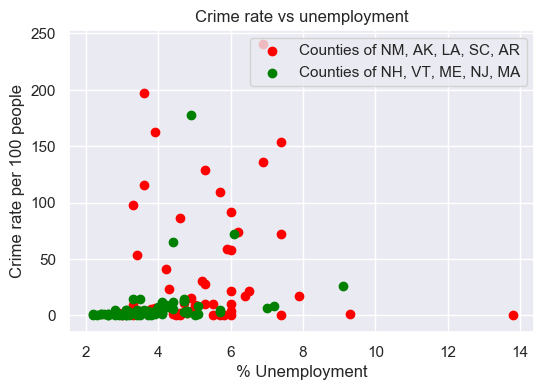

In [405]:
# Crime rate vs unemployment
plt.figure(dpi = 100)
plt.scatter(worst_df['Unemployment Rate'], worst_df['total-crime-per100'], c = 'red', label = 'Counties of NM, AK, LA, SC, AR')
plt.scatter(best_df['Unemployment Rate'], best_df['total-crime-per100'], c = 'green', label = 'Counties of NH, VT, ME, NJ, MA')
plt.title('Crime rate vs unemployment')
plt.xlabel('% Unemployment')
plt.ylabel('Crime rate per 100 people')
plt.legend()
plt.show()

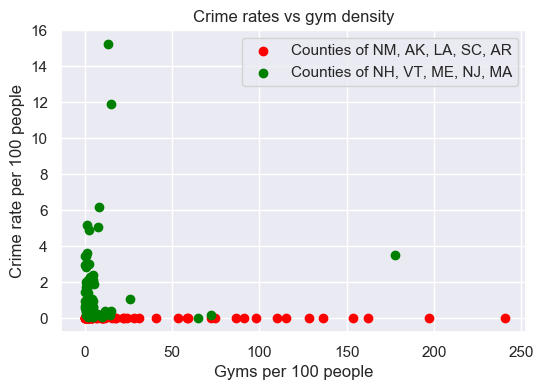

In [406]:
# Crime rate vs gym density
plt.figure(dpi = 100)
plt.scatter(worst_df['total-crime-per100'], worst_df['gym-per100'], c = 'red', label = 'Counties of NM, AK, LA, SC, AR')
plt.scatter(best_df['total-crime-per100'], best_df['gym-per100'], c = 'green', label = 'Counties of NH, VT, ME, NJ, MA')
plt.title('Crime rates vs gym density')
plt.xlabel('Gyms per 100 people')
plt.ylabel('Crime rate per 100 people')
plt.legend()
plt.show()

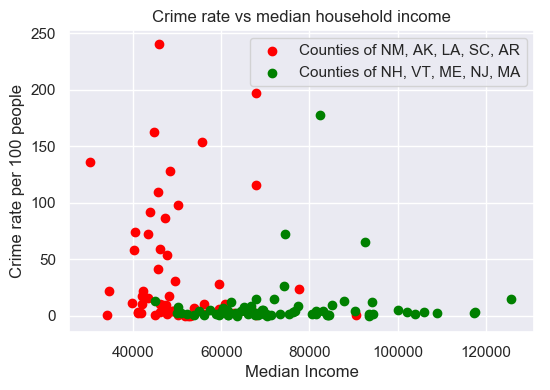

In [407]:
# Crime rate vs Median household income
plt.figure(dpi = 100)
plt.scatter(worst_df['MedianIncome'], worst_df['total-crime-per100'], c = 'red', label = 'Counties of NM, AK, LA, SC, AR')
plt.scatter(best_df['MedianIncome'], best_df['total-crime-per100'], c = 'green', label = 'Counties of NH, VT, ME, NJ, MA')
plt.title('Crime rate vs median household income')
plt.xlabel('Median Income')
plt.ylabel('Crime rate per 100 people')
plt.legend()
plt.show()

# Collecting Hospital Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

import gmaps

from config import gkey

In [2]:
os.getcwd()

'C:\\Users\\lianx\\Desktop\\UCSD_project\\Data_Viz_Project'

In [3]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

state_abbre = ["AL","AK","AZ","AR","CA","CO","CT","DE","DC","FL","GA","HI","ID","IL","IN",
              "IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV",
              "NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","PR","RI","SC","SD","TN",
              "TX","UT","VT","VA","WA","WV","WI","WY"]

states_dict = dict(zip(states, state_abbre))
states_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin':

In [4]:
# File to Load 
income_state_to_load = "./list_of_state_and_counties_by_median_income.csv"

# Read hospital Data File and store into Pandas Data Frames
income_state0 = pd.read_csv(income_state_to_load)
income_state0['State'] = income_state0['State'].map(states_dict)

income_state0.head()

,State,County,MedianIncome
0,AL,cleburne,46069
1,AL,dale,56132
2,AL,tuscaloosa,58922
3,AL,talladega,43074
4,AL,monroe,36807


In [5]:
income_state = income_state0.groupby('State').mean()
income_state

,MedianIncome
State,
AK,71969.724138
AL,47967.761194
AR,44976.613333
AZ,49903.933333
CA,66207.379310
CO,63446.046875
CT,88058.125000
DC,79665.000000
DE,68558.666667


In [6]:
# File to Load 
hospital_state_to_load = "./hospital_state_location.csv"

# Read hospital Data File and store into Pandas Data Frames
hospital_state = pd.read_csv(hospital_state_to_load)

hospital_state.head()

,State,Hospital,POPESTIMATE2018,Density,Latitude,Longitude
0,TX,798,28701845.0,2.78,31.4757,-99.3312
1,CA,569,39557045.0,1.44,37.1841,-119.4696
2,FL,350,21299325.0,1.64,28.6305,-82.4497
3,OH,290,11689442.0,2.48,40.2862,-82.7937
4,PA,279,12807060.0,2.18,40.8781,-77.7996


In [26]:
# File to Load 
unemployment_state_to_load = "./states_by_unemployment_rate.csv"

# Read hospital Data File and store into Pandas Data Frames
unemployment_state = pd.read_csv(unemployment_state_to_load)
unemployment_state['State'] = unemployment_state['State'].map(states_dict)
unemployment_state.head()



,State,Unemployment
0,HI,2.1
1,ND,2.6
2,NH,2.6
3,ME,2.7
4,VT,2.8


In [7]:
# File to Load 
crime_state_to_load = "./crime_by_state.csv"

# Read hospital Data File and store into Pandas Data Frames
crime_state0 = pd.read_csv(crime_state_to_load)

crime_state0.head()

,year,state_abbr,state_id,population,aggravated_assault,arson,burglary,homicide,larceny,motor_vehicle_theft,property_crime,rape_legacy,rape_revised,robbery,violent_crime
0,1983,AL,2,3959000,11281,NaN,42485,364,94279,9126,145890,931,NaN,3895,16471
1,1984,AL,2,3990000,11995,NaN,39970,374,89198,9319,138487,1002,NaN,3833,17204
2,2001,AL,2,4468912,12250,NaN,40642,379,119992,12619,173253,1369,NaN,5584,19582
3,2002,AL,2,4478896,12002,NaN,42578,303,123932,13890,180400,1664,NaN,5962,19931
4,2003,AL,2,4503726,11338,NaN,43245,299,124039,14957,182241,1656,NaN,6038,19331


In [8]:
crime_state0 = crime_state0.set_index('year')
crime_state0.head(20)

,state_abbr,state_id,population,aggravated_assault,arson,burglary,homicide,larceny,motor_vehicle_theft,property_crime,rape_legacy,rape_revised,robbery,violent_crime
year,,,,,,,,,,,,,,
1983,AL,2,3959000,11281,NaN,42485,364,94279,9126,145890,931,NaN,3895,16471
1984,AL,2,3990000,11995,NaN,39970,374,89198,9319,138487,1002,NaN,3833,17204
2001,AL,2,4468912,12250,NaN,40642,379,119992,12619,173253,1369,NaN,5584,19582
2002,AL,2,4478896,12002,NaN,42578,303,123932,13890,180400,1664,NaN,5962,19931
2003,AL,2,4503726,11338,NaN,43245,299,124039,14957,182241,1656,NaN,6038,19331
2004,AL,2,4525375,11286,NaN,44666,254,123650,14024,182340,1742,NaN,6042,19324
2005,AL,2,4548327,11293,NaN,43473,374,120780,13140,177393,1564,NaN,6447,19678
2006,AL,2,4599030,10463,NaN,44780,382,121451,15018,181249,1646,NaN,7062,19553
2007,AL,2,4627851,11417,NaN,45379,412,124465,14238,184082,1548,NaN,7398,20775


In [9]:
type(crime_state0.index[0])

numpy.int64

In [12]:
crime_state = crime_state0.loc[2017,['state_abbr','motor_vehicle_theft','property_crime','robbery','violent_crime']]
#crime_state1 = crime_state0.loc[2017,:]
crime_state = crime_state.reset_index()
crime_state.head()


,year,state_abbr,motor_vehicle_theft,property_crime,robbery,violent_crime
0,2017,AL,12841,144160,4217,25551
1,2017,AK,4258,26204,951,6133
2,2017,AZ,19058,204515,7440,35644
3,2017,AR,7253,92489,1935,16671
4,2017,CA,168391,987114,56622,177627


In [27]:
#merge income and hospital

data_complete1 = pd.merge(hospital_state, income_state, how="left", on=["State", "State"])
data_complete1.head()
data_complete1 = pd.merge(data_complete1, unemployment_state, how="left", on=["State", "State"])
data_complete1.head()

,State,Hospital,POPESTIMATE2018,Density,Latitude,Longitude,MedianIncome,Unemployment
0,TX,798,28701845.0,2.78,31.4757,-99.3312,55457.161417,4.0
1,CA,569,39557045.0,1.44,37.1841,-119.4696,66207.379310,4.3
2,FL,350,21299325.0,1.64,28.6305,-82.4497,53106.253731,3.9
3,OH,290,11689442.0,2.48,40.2862,-82.7937,57974.443182,4.4
4,PA,279,12807060.0,2.18,40.8781,-77.7996,60868.805970,4.8


In [28]:
data_complete2 = pd.merge(data_complete1, crime_state, how="left", left_on="State", right_on="state_abbr")
data_complete2.head()

,State,Hospital,POPESTIMATE2018,Density,Latitude,Longitude,MedianIncome,Unemployment,year,state_abbr,motor_vehicle_theft,property_crime,robbery,violent_crime
0,TX,798,28701845.0,2.78,31.4757,-99.3312,55457.161417,4.0,2017.0,TX,68041.0,725328.0,32267.0,124238.0
1,CA,569,39557045.0,1.44,37.1841,-119.4696,66207.379310,4.3,2017.0,CA,168391.0,987114.0,56622.0,177627.0
2,FL,350,21299325.0,1.64,28.6305,-82.4497,53106.253731,3.9,2017.0,FL,42914.0,527220.0,18597.0,85625.0
3,OH,290,11689442.0,2.48,40.2862,-82.7937,57974.443182,4.4,2017.0,OH,20253.0,282034.0,11605.0,34683.0
4,PA,279,12807060.0,2.18,40.8781,-77.7996,60868.805970,4.8,2017.0,PA,12985.0,211220.0,11793.0,40120.0


In [72]:
data_complete2['Income%'] = data_complete2['MedianIncome']/data_complete2['POPESTIMATE2018']*100000
data_complete2['motor_vehicle_theft%'] = data_complete2['motor_vehicle_theft']/data_complete2['POPESTIMATE2018']*100000
data_complete2['property_crime%'] = data_complete2['property_crime']/data_complete2['POPESTIMATE2018']*100000
data_complete2['robbery%'] = data_complete2['robbery']/data_complete2['POPESTIMATE2018']*100000
data_complete2['violent_crime%'] = data_complete2['violent_crime']/data_complete2['POPESTIMATE2018']*100000
data_complete2['total_crime%'] = (data_complete2['property_crime'] + data_complete2['violent_crime'])/data_complete2['POPESTIMATE2018']*100000

data_complete2.head()

,State,Hospital,POPESTIMATE2018,Density,Latitude,Longitude,MedianIncome,Unemployment,year,state_abbr,motor_vehicle_theft,property_crime,robbery,violent_crime,Income%,motor_vehicle_theft%,property_crime%,robbery%,violent_crime%,total_crime%
0,TX,798,28701845.0,2.78,31.4757,-99.3312,55457.161417,4.0,2017.0,TX,68041.0,725328.0,32267.0,124238.0,193.218106,237.061415,2527.112804,112.421344,432.857191,2959.969995
1,CA,569,39557045.0,1.44,37.1841,-119.4696,66207.379310,4.3,2017.0,CA,168391.0,987114.0,56622.0,177627.0,167.371904,425.691555,2495.418958,143.140116,449.040114,2944.459072
2,FL,350,21299325.0,1.64,28.6305,-82.4497,53106.253731,3.9,2017.0,FL,42914.0,527220.0,18597.0,85625.0,249.333036,201.480563,2475.289710,87.312626,402.008045,2877.297755
3,OH,290,11689442.0,2.48,40.2862,-82.7937,57974.443182,4.4,2017.0,OH,20253.0,282034.0,11605.0,34683.0,495.955608,173.258912,2412.724234,99.277622,296.703641,2709.427875
4,PA,279,12807060.0,2.18,40.8781,-77.7996,60868.805970,4.8,2017.0,PA,12985.0,211220.0,11793.0,40120.0,475.275403,101.389390,1649.246587,92.082024,313.264715,1962.511302


In [73]:
data_complete = {}
data_complete = pd.DataFrame({
    'State':data_complete2['State'],
    'Latitude':data_complete2['Latitude'],
    'Longitude':data_complete2['Longitude'],
    'Hospital%':data_complete2['Density'],
    'Income%':data_complete2['Income%'],
    'Unemployment%':data_complete2['Unemployment'],
    'Motor_vehicle_theft%':data_complete2['motor_vehicle_theft%'],
    'property_crime%':data_complete2['property_crime%'],
    'robbery%':data_complete2['robbery%'],
    'violent_crime%':data_complete2['violent_crime%'],
    'TotalCrime%':data_complete2['total_crime%']
})

data_complete.head()

,State,Latitude,Longitude,Hospital%,Income%,Unemployment%,Motor_vehicle_theft%,property_crime%,robbery%,violent_crime%,TotalCrime%
0,TX,31.4757,-99.3312,2.78,193.218106,4.0,237.061415,2527.112804,112.421344,432.857191,2959.969995
1,CA,37.1841,-119.4696,1.44,167.371904,4.3,425.691555,2495.418958,143.140116,449.040114,2944.459072
2,FL,28.6305,-82.4497,1.64,249.333036,3.9,201.480563,2475.289710,87.312626,402.008045,2877.297755
3,OH,40.2862,-82.7937,2.48,495.955608,4.4,173.258912,2412.724234,99.277622,296.703641,2709.427875
4,PA,40.8781,-77.7996,2.18,475.275403,4.8,101.389390,1649.246587,92.082024,313.264715,1962.511302


In [52]:
a = len(data_complete)
type([data_complete['Income%']])

list

In [56]:
len(data_complete['Income%'])

52

In [68]:
# slope,intercept = np.polyfit(list(data_complete['Income%']), list(data_complete['property_crime%']),1)
# print(slope)
import seaborn as sns
import statsmodels.api as sm


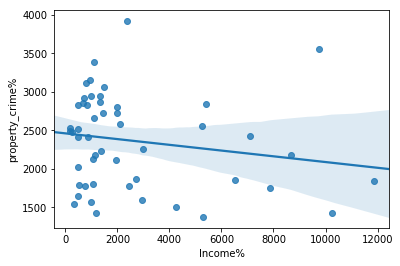

In [75]:
sns.regplot( x ='Income%', y='property_crime%', data = data_complete )

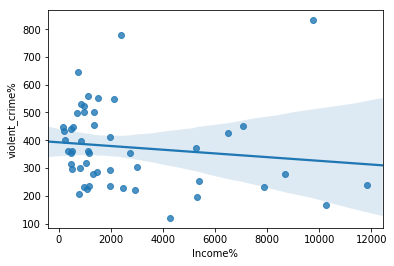

In [76]:
sns.regplot(x ='Income%', y='violent_crime%', data = data_complete)

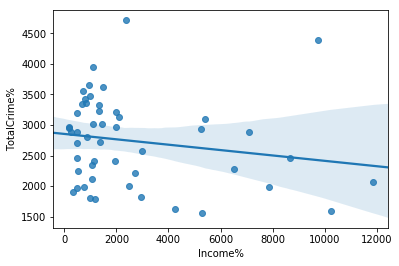

In [78]:
sns.regplot(x ='Income%', y ='TotalCrime%', data = data_complete)

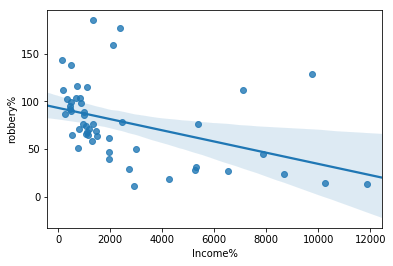

In [80]:
sns.regplot(x='Income%', y='robbery%',data = data_complete)

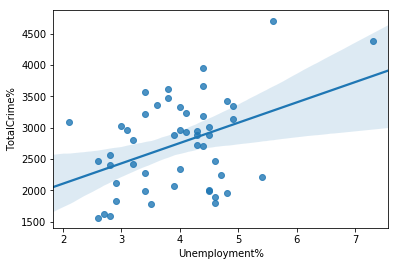

In [83]:
sns.regplot(x='Unemployment%', y ='TotalCrime%' ,data = data_complete)

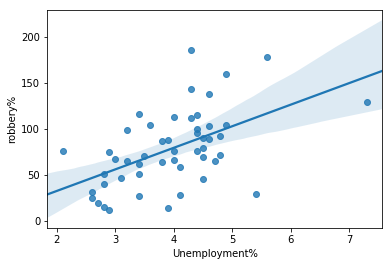

In [84]:
sns.regplot(x='Unemployment%', y ='robbery%' ,data = data_complete)

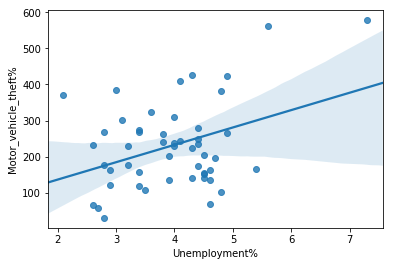

In [85]:
sns.regplot(x='Unemployment%', y ='Motor_vehicle_theft%' ,data = data_complete)

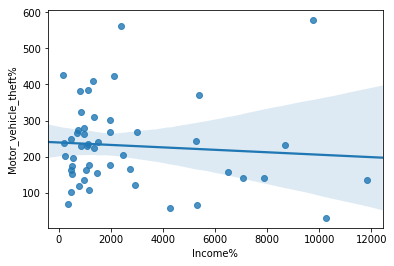

In [86]:
sns.regplot(x='Income%', y ='Motor_vehicle_theft%' ,data = data_complete)

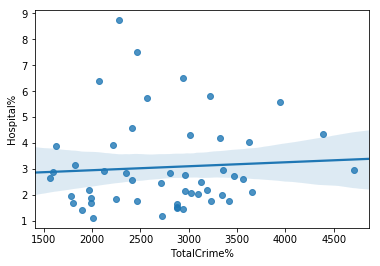

In [90]:
sns.regplot(x='TotalCrime%', y ='Hospital%' ,data = data_complete)

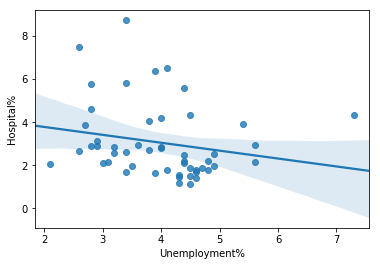

In [89]:
sns.regplot(x='Unemployment%', y ='Hospital%' ,data = data_complete)

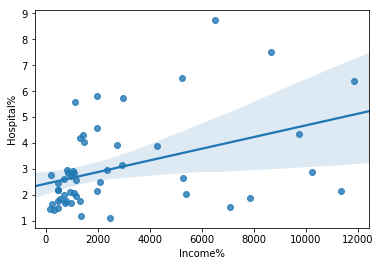

In [91]:
sns.regplot(x='Income%', y ='Hospital%' ,data = data_complete)